# **Adult Census Income**
## **Predict whether income exceeds $50K/yr based on census data**

Mata Kuliah : Data Mining  
Kelas       : PPTI-18  
Kelompok    : 5 
Anggota     :  
- Gabriel Gavin Geraldo - 2702365303
- Shanella Christina - 2702365215
- Victoria Simanjaya - 2702364364


### **1. Perkenalan Dataset**

Dataset berasal dari kaggle :   

Source kaggle : **https://www.kaggle.com/datasets/uciml/adult-census-income?resource=download**

### **2. Import Library dan Setting Output**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### **3. Import Dataset**

In [2]:
data = pd.read_csv('adult.csv')

### **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, akan dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

**a. Struktur Dataset**    
**b. Distribusi Target Class**  
**c. Visualisasi dan Insight Awal**  
**d. Mapping Target Class dan Korelasi Fitur**


### **a. Struktur Dataset**

In [3]:
data.shape

(32561, 15)

In [4]:
data.head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [7]:
categorical_columns = data.select_dtypes(include='object').columns

unique_summary = {
    'Column': [],
    'Unique Count': [],
    'Unique Values': []
}

for col in categorical_columns:
    unique_summary['Column'].append(col)
    unique_summary['Unique Count'].append(data[col].nunique())
    unique_summary['Unique Values'].append(data[col].unique().tolist())

unique_summary_data = pd.DataFrame(unique_summary)
unique_summary_data

,Column,Unique Count,Unique Values
0,workclass,9,"[?, Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked]"
1,education,16,"[HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool]"
2,marital.status,7,"[Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse]"
3,occupation,15,"[?, Exec-managerial, Machine-op-inspct, Prof-specialty, Other-service, Adm-clerical, Craft-repair, Transport-moving, Handlers-cleaners, Sales, Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]"
4,relationship,6,"[Not-in-family, Unmarried, Own-child, Other-relative, Husband, Wife]"
5,race,5,"[White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo]"
6,sex,2,"[Female, Male]"
7,native.country,42,"[United-States, ?, Mexico, Greece, Vietnam, China, Taiwan, India, Philippines, Trinadad&Tobago, Canada, South, Holand-Netherlands, Puerto-Rico, Poland, Iran, England, Germany, Italy, Japan, Hong, Honduras, Cuba, Ireland, Cambodia, Peru, Nicaragua, Dominican-Republic, Haiti, El-Salvador, Hungary, Columbia, Guatemala, Jamaica, Ecuador, France, Yugoslavia, Scotland, Portugal, Laos, Thailand, Outlying-US(Guam-USVI-etc)]"
8,income,2,"[<=50K, >50K]"


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
data.describe(include="object").T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


#### **Insight Struktur Data**

- **Jumlah Baris dan Kolom**:  
  Dataset ini terdiri dari 32.561 entri dan 15 kolom.

- **Jenis Data dan Tipe Kolom**:
  - **Kolom Numerik**:  
    Terdapat 6 kolom dengan tipe data `int64`, yaitu: `age`, `fnlwgt` (Final Weight), `education.num`, `capital.gain`, `capital.loss`, dan `hours.per.week`.

  - **Kolom Kategorikal**:  
    Terdapat 9 kolom dengan tipe data `object` yang terdiri dari kategori seperti: `workclass`, `education`, `marital.status`, `occupation`, `relationship`, `race`, `sex`, `native.country`, dan `income`.

- **Kolom Kategorikal - Nilai Unik**:
  - **workclass** memiliki 9 nilai unik, termasuk yang tidak terdefinisi dengan simbol `'?'`.
  - **education** memiliki 16 nilai unik yang mencakup berbagai tingkat pendidikan.
  - **marital.status** memiliki 7 nilai unik yang mencerminkan status pernikahan atau hubungan.
  - **occupation** memiliki 15 nilai unik, dengan banyak kategori pekerjaan, termasuk simbol `'?'` untuk nilai yang hilang.
  - **relationship** memiliki 6 nilai unik yang menggambarkan hubungan keluarga.
  - **race** hanya memiliki 5 kategori, mencakup ras yang berbeda.
  - **sex** memiliki 2 kategori: `Female` dan `Male`.
  - **native.country** memiliki 42 nilai unik yang mencakup berbagai negara asal, dengan beberapa nilai yang hilang ditandai dengan `'?'`.
  - **income** adalah target variabel dengan 2 kategori: `<=50K` dan `>50K`.

- **Data Describe**:
  Secara keseluruhan statistic descriptive dari datanya terlihat masuk akal dan tidak ada yang janggal, namun mungkin perlu diperhatikan pada rentang-rentang data yang sangat luas dan kemungkinan adanya outlier. 
  Selain itu, berdasarkan struktur data, tidak ada missing values (secara langsung). Output Non-Null Count menunjukkan semua kolom memiliki 32.561 nilai non-null, yang berarti tidak ada missing value yang direpresentasikan sebagai NaN (Not a Number) atau nilai kosong standar di Pandas. Namun setelah melihat nilai unique dalam data kategorikal, ada simbol "?" yang mengindikasikan adanya missing value tersembunyi dalam bentuk string ssehingga harus di tangani

- **Tahapan Pre-processing**: harus dilakukan penghapusan missing value

### **b. Distribusi Target Class**

C:\Users\shane\AppData\Local\Temp\ipykernel_4836\3410060378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='income', data=data, palette=green_colors)


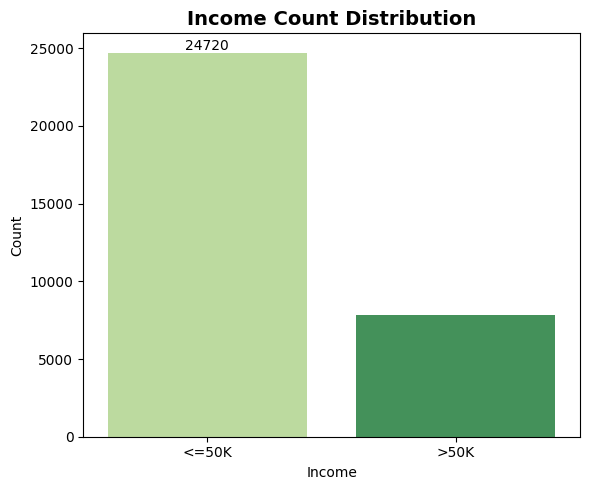

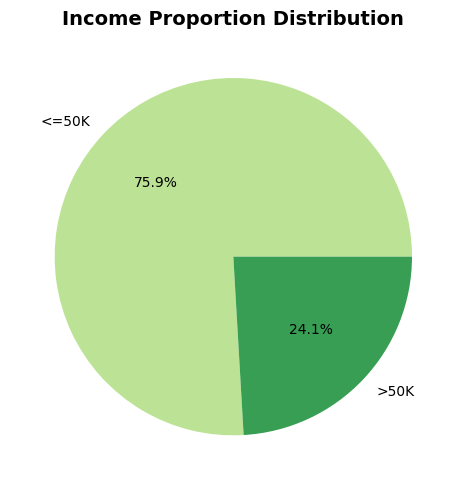

In [10]:
green_colors = sns.color_palette("YlGn", n_colors=2)

plt.figure(figsize=(6,5))
ax = sns.countplot(x='income', data=data, palette=green_colors)
ax.bar_label(ax.containers[0])
plt.title('Income Count Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 5))
plt.title('Income Proportion Distribution', fontsize=14, fontweight='bold')
income_pct = data['income'].value_counts(normalize=True)
plt.pie(income_pct, labels=income_pct.index, autopct='%1.1f%%', colors=green_colors)
plt.tight_layout()
plt.show()

**Analisis Target Class**  
Insight Distribusi Variabel Target (Income):
- Imbalance Dataset: Terlihat jelas bahwa distribusi kelas pada variabel target Income sangat tidak seimbang (imbalanced). Ada 24.720 entri dengan pendapatan <=50K. Ada sekitar 7.841 entri (total 32561 - 24720) dengan pendapatan >50K.

Mayoritas Kelas: Mayoritas individu dalam dataset ini memiliki pendapatan <=50K. Ini berarti kelas <=50K adalah kelas mayoritas, sedangkan kelas >50K adalah kelas minoritas.

**Tahapan Preprocessing**
- Perlu dilakukannya oversampling untuk kelas minoritas dan undersampling untuk kelas mayoritas 

### **c. Visualisasi dan Insight Awal**

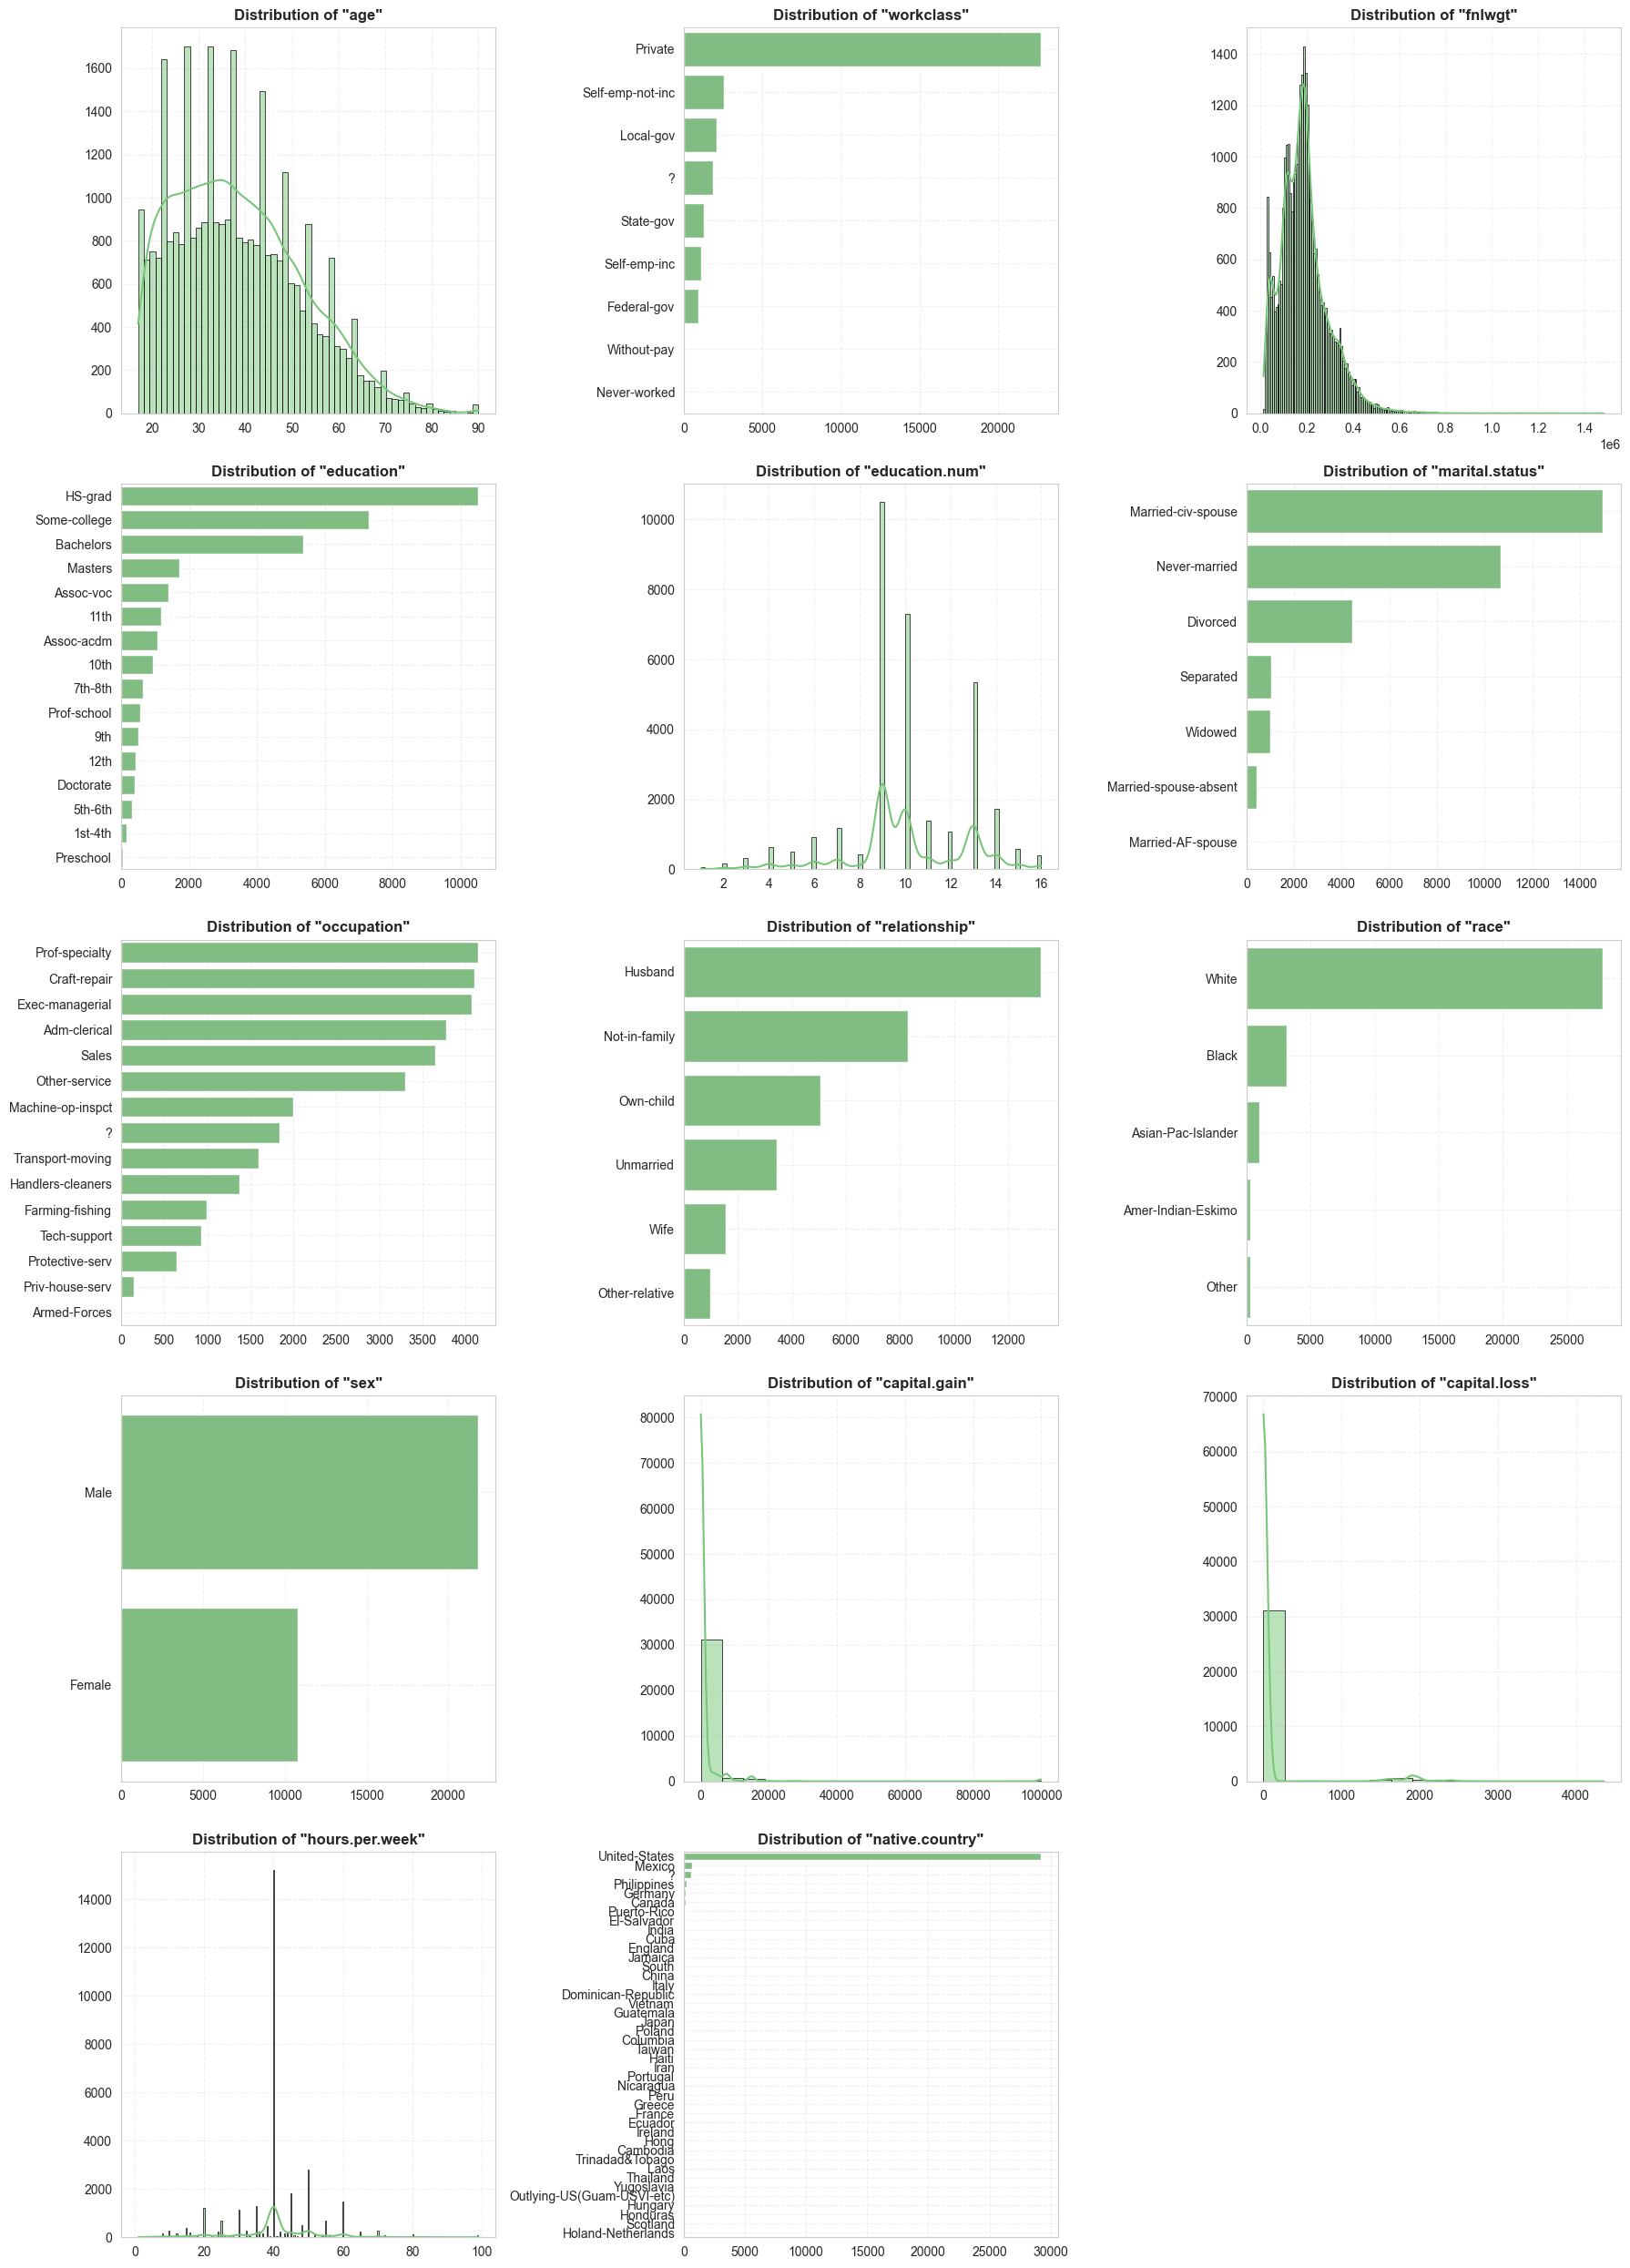

In [11]:
sns.set_style("whitegrid")
green_colors = sns.color_palette("YlGn", n_colors=1)
feature_cols = data.columns.drop('income')  
num_features = len(feature_cols)
num_rows = math.ceil(num_features / 3)

plt.figure(figsize=(18, 5 * num_rows))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(num_rows, 3, i)
    
    if pd.api.types.is_numeric_dtype(data[col]):
        sns.histplot(
            data[col],
            kde=True,
            color=green_colors[0],
            edgecolor='black',
            linewidth=0.5
        )
    else:
        sns.countplot(
            y=col,
            data=data,
            color=green_colors[0],
            order=data[col].value_counts().index 
        )
    
    plt.title(f'Distribution of "{col}"', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**Distribusi Fitur Numerik**
1. Distribution of age
Insight: Distribusi usia cenderung right-skewed (miring ke kanan), dengan sebagian besar individu berada di rentang usia muda hingga paruh baya (sekitar 20-40 tahun). Ada puncak di sekitar usia 30-an. Ada juga ekor yang panjang ke arah usia yang lebih tua, meskipun jumlah individu semakin berkurang.

2. Distribution of fnlwgt
Insight: Distribusi fnlwgt sangat highly skewed to the right (miring sangat jauh ke kanan). Mayoritas nilai fnlwgt terkonsentrasi pada nilai-nilai yang lebih rendah, dengan beberapa nilai yang sangat tinggi (ekor panjang).

3. Distribution of education.num
Insight: Distribusi ini menunjukkan puncak yang jelas di angka 9 dan 10. Angka 9 kemungkinan besar adalah "HS-grad" (High School Graduate) dan 10 adalah "Some-college" (Beberapa tahun kuliah), yang merupakan tingkat pendidikan paling umum dalam dataset. Ada juga puncak lain di 13 (Bachelors) dan 16 (Doctorate).

4. Distribution of capital.gain
Insight: Mayoritas besar individu memiliki capital.gain sebesar 0. Hanya sejumlah kecil individu yang memiliki capital.gain di atas 0, dan dari yang memiliki capital.gain positif, distribusinya sangat skewed dengan beberapa nilai yang sangat tinggi.
Saran: Kolom ini sangat sparse (jarang ada nilai non-nol) dan skewed. Jika nanti dicheck korelasinya rendah, mendingan dihapus aja.

5. Distribution of capital.loss
Insight: Mirip dengan capital.gain, sebagian besar individu memiliki capital.loss sebesar 0. Hanya sebagian kecil yang memiliki nilai capital.loss di atas 0.
Saran: Sama seperti capital.gain, pertimbangkan apakah fitur perlu di drop atau tidak. 

6.Distribution of hours.per.week
Insight: Distribusi ini menunjukkan puncak yang sangat tajam di sekitar 40 jam per minggu, yang merupakan standar jam kerja penuh waktu. Ada juga beberapa puncak di jam kerja yang lebih rendah atau lebih tinggi, menunjukkan fleksibilitas atau kerja paruh waktu/lembur.
Saran: Distribusi ini masuk akal. Mungkin ada outlier pada jam kerja yang sangat rendah atau sangat tinggi yang perlu diperhatikan, mungkin bisa dibuat skala agar rentangnya tidak terlalu jauh


**Distribusi Fitur Kategorikal**
1. Distribution of workclass
Insight: Kategori Private mendominasi. Ada juga kategori lain seperti Self-emp-not-inc, Local-gov, State-gov, Federal-gov, dan Never-worked. Terlihat ada kategori '?' yang mengkonfirmasi missing values tersembunyi.

Saran: Lakukan penanganan missing values (ganti '?' dengan np.nan lalu imputasi/buang). Setelah itu, lakukan encoding.

2. Distribution of education
Insight: Mirip dengan education.num, HS-grad dan Some-college adalah kategori paling umum, diikuti oleh Bachelors. Ini mengkonfirmasi redudansi dengan education.num.
Saran: Setelah validasi, pertimbangkan untuk menghapus kolom ini dan hanya menggunakan education.num. 

3. Distribution of marital.status
Insight: Kategori Married-civ-spouse adalah yang paling dominan, diikuti oleh Never-married dan Divorced.
Saran: Kolom ini siap untuk label encoding setelah preprocessing.

4. Distribution of occupation
Insight: Ada banyak kategori pekerjaan, dengan Prof-specialty dan Craft-repair menjadi yang paling sering. Ada juga kategori '?' yang menandakan missing values tersembunyi.
Saran: Lakukan penanganan missing values ('?' ke np.nan lalu imputasi/buang). Karena banyak kategori, label encoding pasti akan menghasilkan banyak kolom. Pertimbangkan juga apakah beberapa kategori bisa dikelompokkan jika relevan secara domain.

5. Distribution of relationship
Insight: Kategori Husband dan Not-in-family adalah yang paling umum.

6. Distribution of race
Insight: White adalah ras yang paling dominan, diikuti oleh Black dan Asian-Pac-Islander.
Saran: Kalau korelasinya tidak terlalu tinggi dengan income, hapus aja karena data tidak seimbang dan terlalu banyak white. 

7. Distribution of sex
Insight: Jumlah Male lebih banyak daripada Female.
Saran: Kalau korelasinya tidak terlalu tinggi dengan income, hapus aja karena data tidak seimbang dan terlalu banyak male. 

8. Distribution of native.country
Insight: Sangat didominasi oleh United-States. Ada banyak negara lain yang muncul dalam jumlah sangat kecil, dan juga ada '?' sebagai missing values. Ini adalah kolom dengan kardinalitas sangat tinggi.
Saran: Kalau korelasinya tidak terlalu tinggi dengan income, hapus aja karena data tidak seimbang dan terlalu banyak United States nya. 



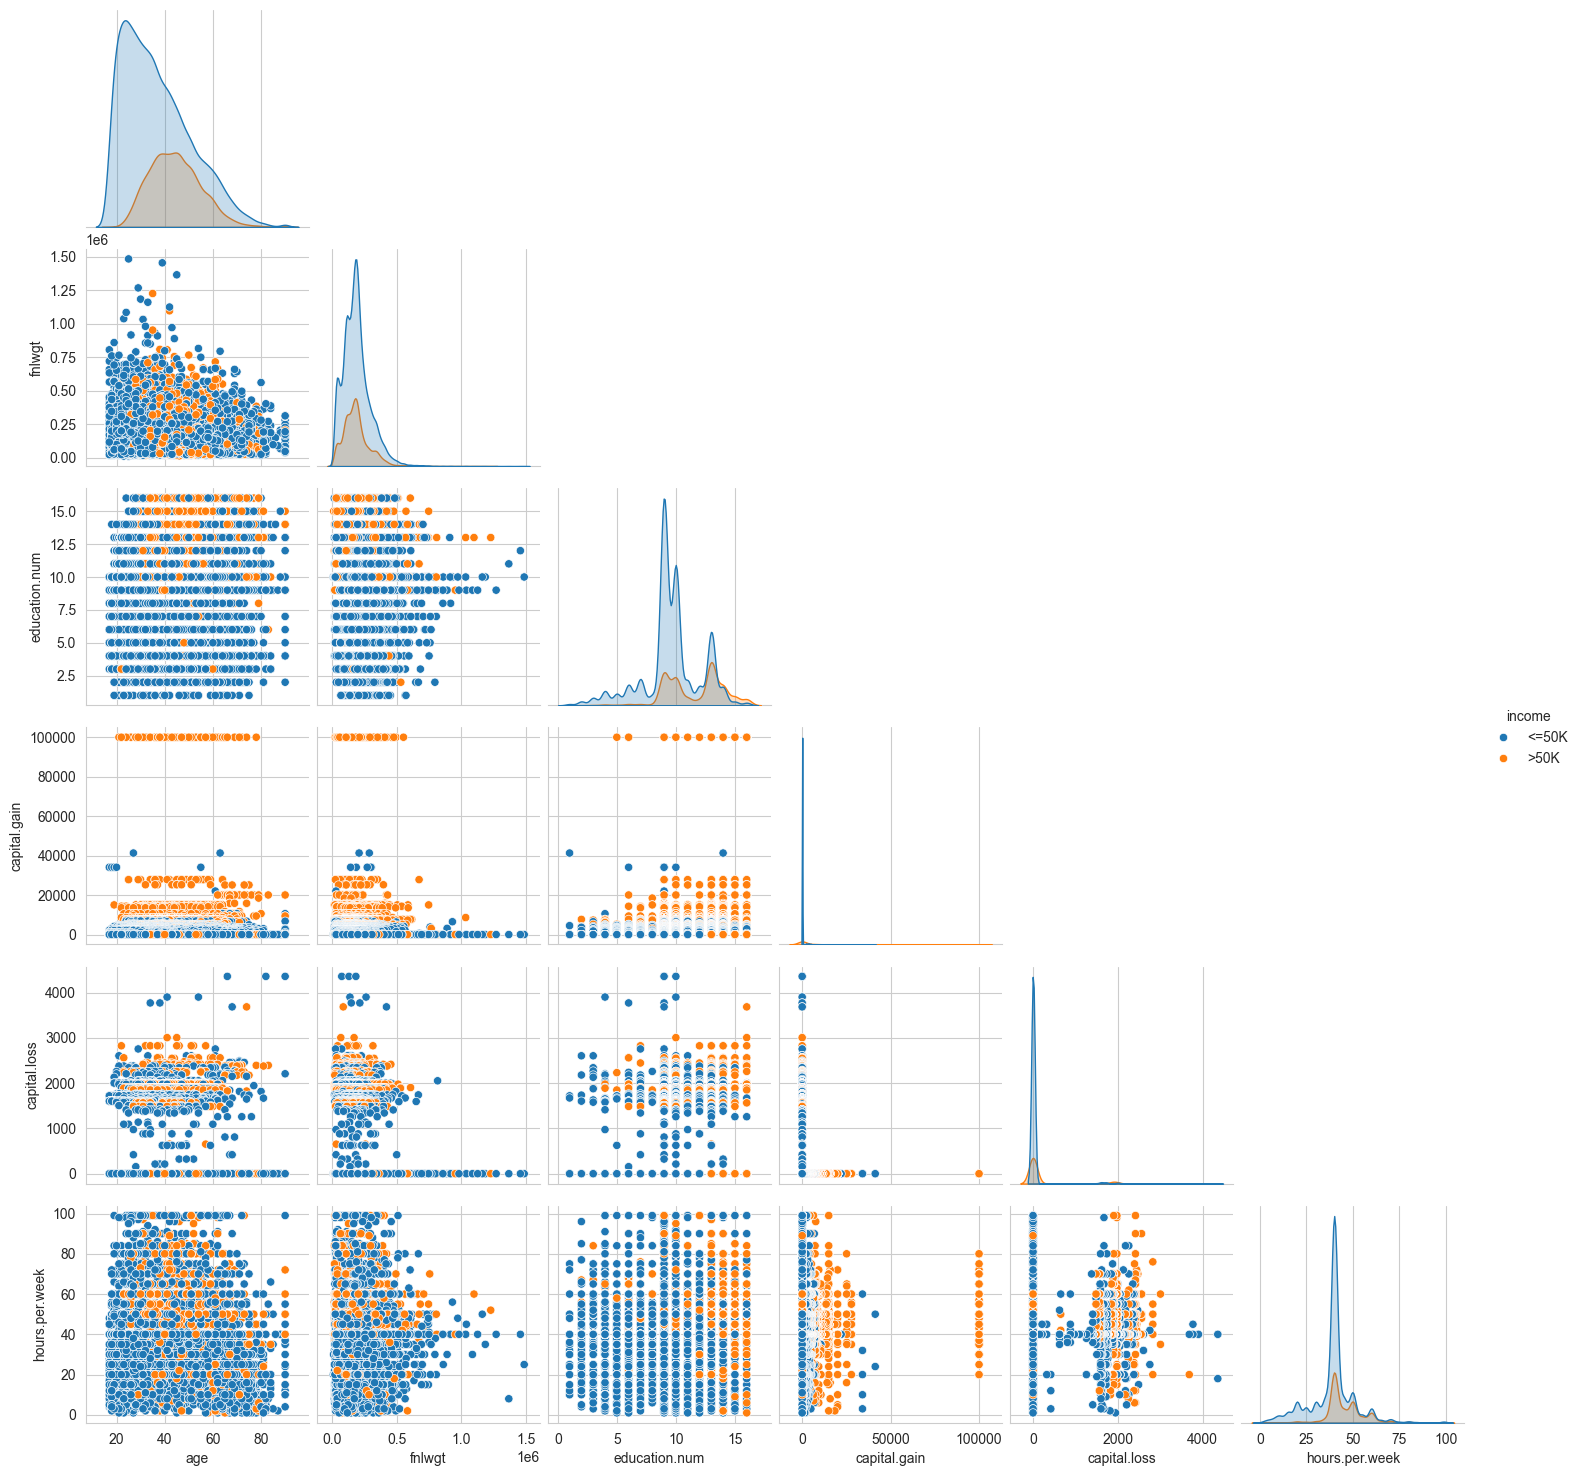

In [12]:
sns.pairplot(data, hue= "income", corner=True)

Memvisualisasikan serangkaian plot (matriks plot) yang menunjukkan hubungan pasangan antara semua variabel numerik dalam dataset, sambil membedakan (memberi warna berbeda) berdasarkan kategori di kolom 'income'. Misal: education num dengan age menunjukkan kalau umurnya antara 20 - 40, education num memiliki range antara 2,5 - 14 dan sedikit sekali yang incomenya di atas 50K pertahunnya


#### **Categorical Feature**

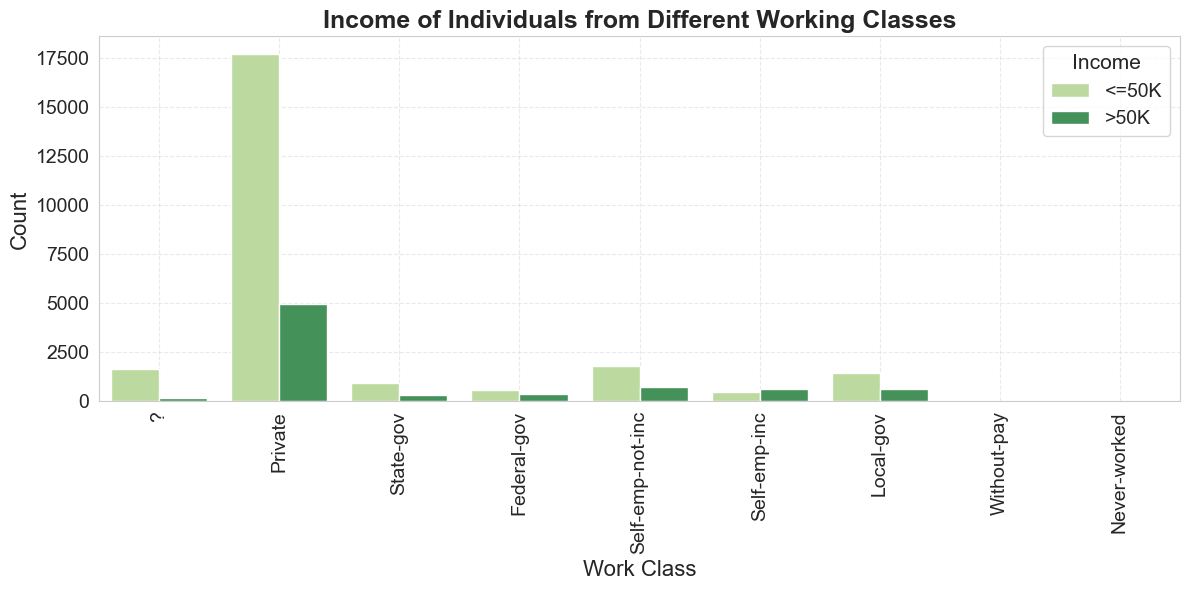

In [13]:
income_order = data['income'].value_counts().index.tolist() 
green_palette = sns.color_palette("YlGn", n_colors=2)
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x='workclass',
    hue='income',
    palette=green_palette,
    hue_order=income_order
)
plt.title('Income of Individuals from Different Working Classes', fontsize=18, fontweight='bold')
plt.xlabel('Work Class', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Analisis Income per Working Class**
- Private: Mayoritas individu di kelas ini berpendapatan <=50K, namun ini juga merupakan kategori dengan jumlah individu >50K terbanyak secara absolut.
- Self-emp-inc (Self-employed Incorporated) & Federal-gov: Proporsi individu >50K relatif tinggi di kategori ini dibandingkan dengan kategori lain.
- Without-pay & Never-worked: Hampir semua individu di kategori ini berpendapatan <=50K.
- ? (Missing Values): Proporsi <=50K sangat dominan di kategori ini. Ini menunjukkan bahwa nilai yang hilang mungkin terkait dengan individu berpendapatan rendah atau tidak bekerja.

**Saran untuk tahapan preprocessing:** Workclass adalah fitur yang sangat penting. Tangani missing values (?) dengan imputasi (misalnya dengan modus atau kategori terpisah jika '?' diasumsikan sebagai "tidak diketahui/tidak relevan untuk kerja"). Lakukan juga re-categorization untuk fitur ini karena mungkin bisa digabungkan untuk yang self-emp-not-inc dan self-emp-inc. Lalu, yang berhubungan dengan goverment juga

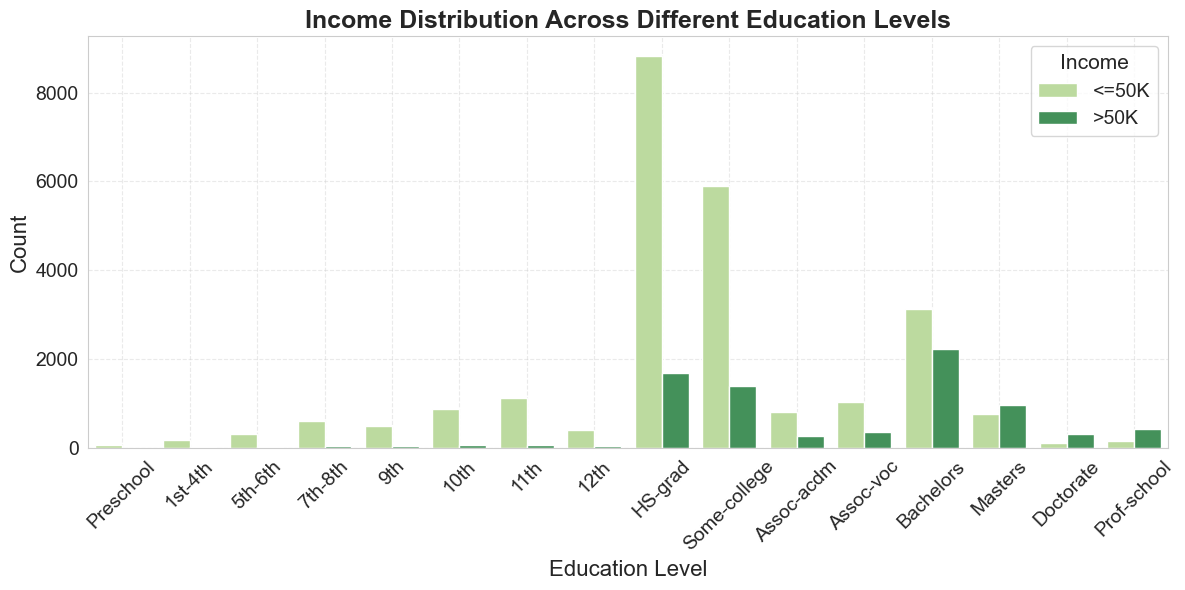

In [14]:
order_list = [
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors',
    'Masters', 'Doctorate', 'Prof-school'
]
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data,
    x='education',
    hue='income',
    palette=green_palette,
    order=order_list,
    hue_order=income_order
)
plt.title('Income Distribution Across Different Education Levels', fontsize=18, fontweight='bold')
plt.xlabel('Education Level', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Analisis Income per Education Level**
* 7-12th Standard: Hanya sedikit yang berpenghasilan lebih dari 50K dolar per tahun, mayoritas berpenghasilan kurang dari 50K.

* Some-college: Masih jauh lebih banyak berpenghasilan <=50k

* Bachelor: Sudah hampir seimbang 

* Masters, Doctorate, Prof-school: Lebih banyak yang berpenghasilan >50K dolar per tahun dibandingkan yang berpenghasilan <=50K.

* Assoc-acdm dan Assoc-voc: Beberapa orang berpenghasilan lebih dari 50K dolar per tahun.

Insight: Adanya hubungan Kuat karena korelasi positif yang sangat jelas antara tingkat pendidikan yang lebih tinggi dan peluang mendapatkan pendapatan >50K. Sementara itu, tingkat pendidikan yang lebih rendah (misalnya Preschool hingga 10th Grade) hampir secara eksklusif berpendapatan <=50K.

Rekomendasi untuk tahapan Preprocessing: menyederhanakan kategori education menjadi kelompok besar untuk mengurangi kompleksitas, dari 16 label jadi 3 label

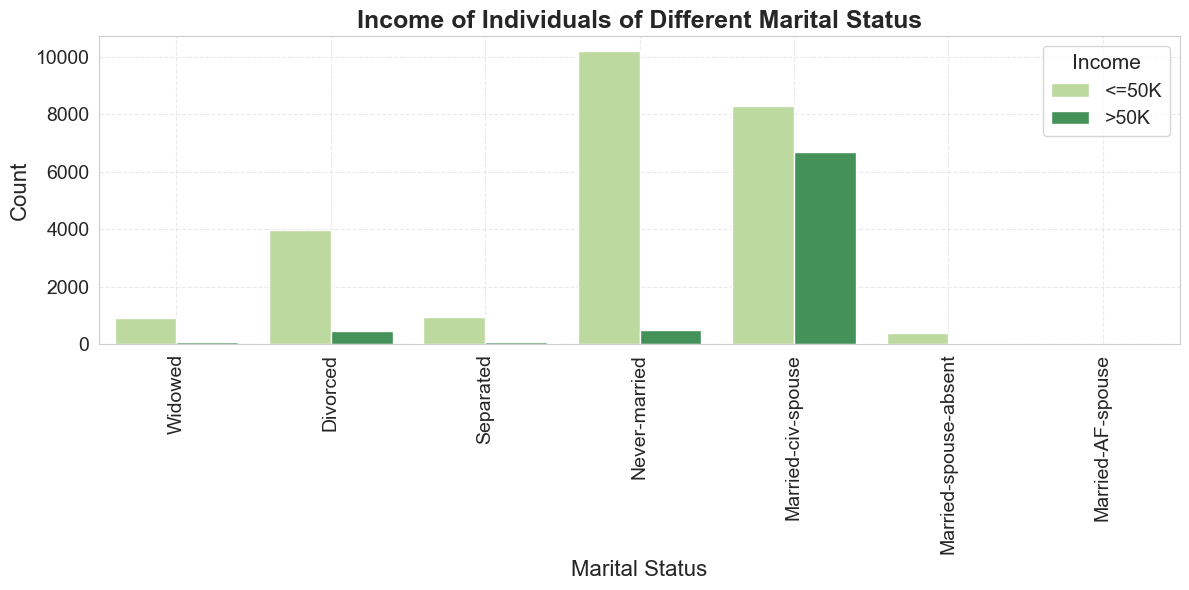

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='marital.status',
    hue='income',
    data=data,
    palette=green_palette,
    hue_order=income_order
)

# Judul dan styling
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**Analisis Income per Marital Status**
* Married-civ-spouse: Hanya kategori ini yang memiliki jumlah orang dengan pendapatan >50K dolar per tahun hampir sebanding dengan yang pendapatannya <=50K dolar.

* Kategori lainnya: Lebih dari 75% orang di kategori ini berpendapatan <=50K dolar per tahun.

<function matplotlib.pyplot.yticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

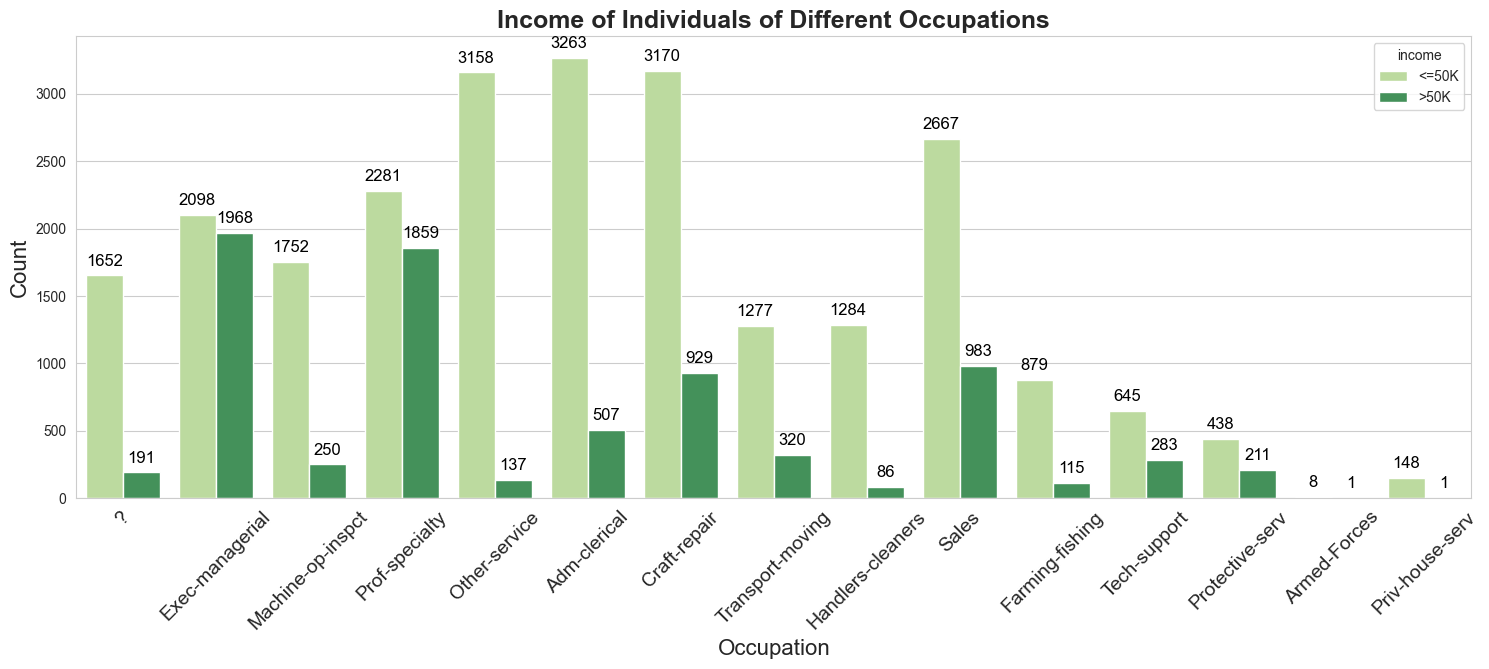

In [16]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(
    x='occupation',
    hue='income',
    data=data,
    palette=green_palette,
    hue_order=income_order
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=12, color='black',
            xytext=(0, 5),
            textcoords='offset points'
        )

plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks

**Analisis Income per Occupation**

* **Exec-managerial**: Peluang orang dewasa dengan pekerjaan ini untuk mendapatkan >50K hampir sama dengan yang mendapatkan <=50K.
* **Prof-specialty**: Sekitar 33% orang dewasa di bidang ini berpeluang mendapatkan >50K.
* **Sales**: Sekitar 25% orang dewasa di bidang ini berpenghasilan >50K.
* **Label sisanya**: Orang-orang yang bekerja di bidang tersebut jarang berpenghasilan >50K.

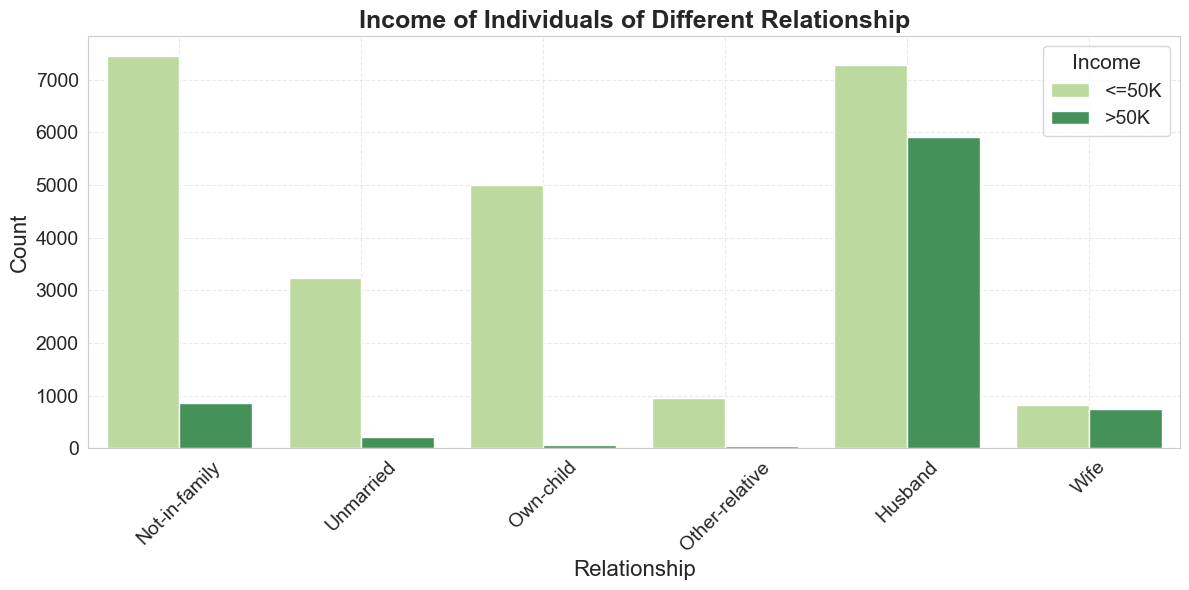

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='relationship',
    hue='income',
    data=data,
    palette=green_palette,
    hue_order=income_order
)

plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xlabel('Relationship', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**Analisis Income per Different Relationship**

* Istri memiliki peluang besar untuk menghasilkan >50K.
* Suami cenderung menghasilkan <=50K.
* Sangat sedikit yang belum menikah menghasilkan >50K.

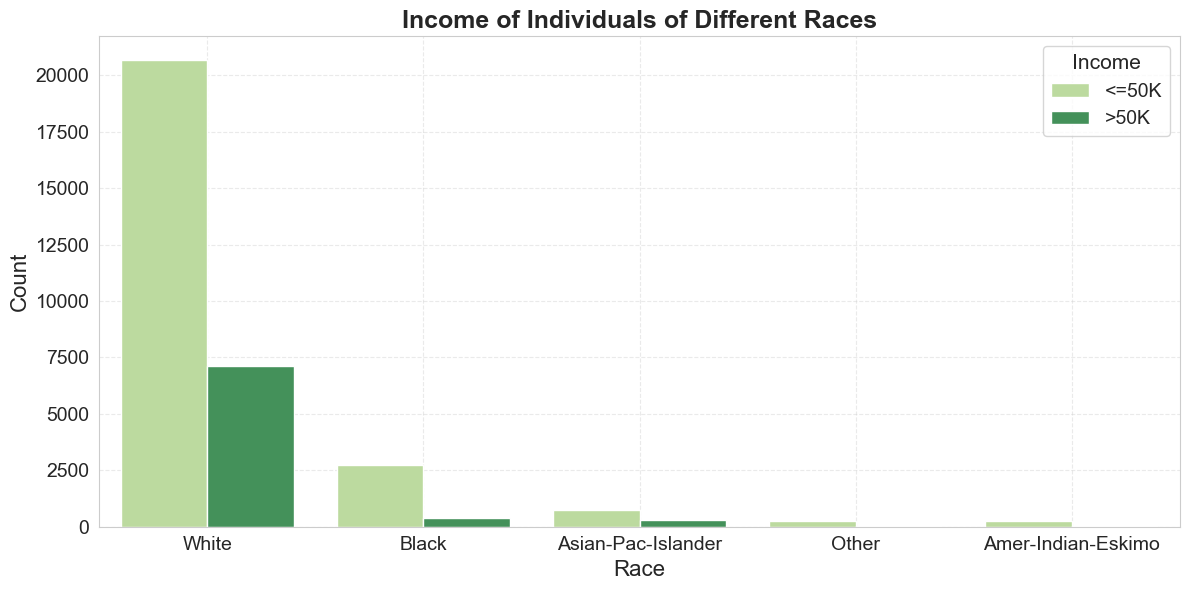

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='race',
    hue='income',
    data=data,
    palette=green_palette,
    hue_order=income_order
)

plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xlabel('Race', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**Analisis Income per Different Races**  

Jumlah orang dari ras selain kulit putih (White) sangat sedikit, sehingga pengaruh label/feature ini pada model perlu dipertimbangkan.


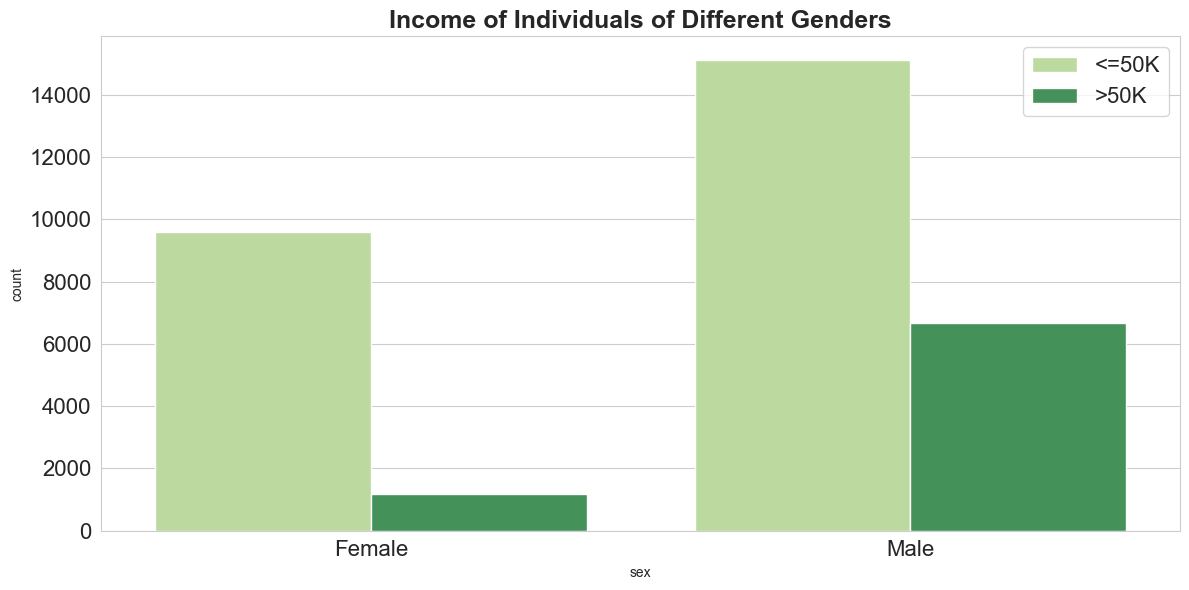

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='sex', hue='income', data=data, palette=green_palette)
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()

**Analisis Income per Different Gender**

* Kedua Gender memiliki kesenjangan signifikan dalam pendapatan.
* Untuk wanita, kurang dari 10% menghasilkan >50K dolar per tahun.
* Untuk pria, sekitar 33% dari mereka yang menghasilkan >50K dolar per tahun.

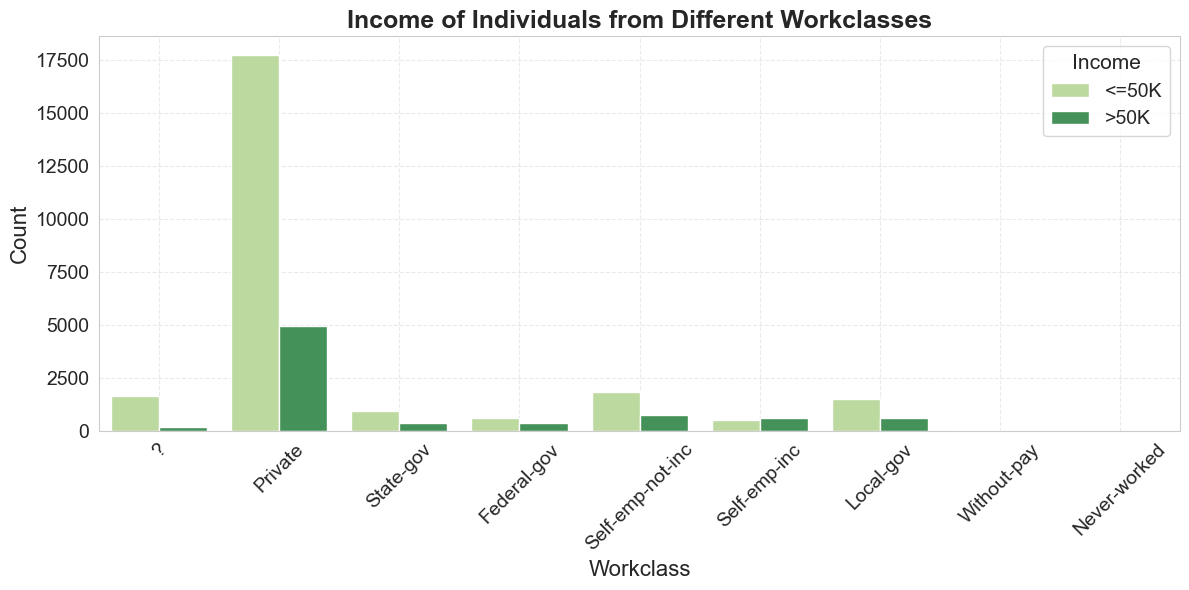

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='workclass',
    hue='income',
    data=data,
    palette=green_palette,
    hue_order=income_order
)

plt.title('Income of Individuals from Different Workclasses', fontsize=18, fontweight='bold')
plt.xlabel('Workclass', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14, rotation=45) 
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


**Analisis Income per Different Workclasses**

- Private Sector:  
Kelompok terbesar dengan mayoritas berpenghasilan ≤50K, tetapi juga menyumbang cukup banyak orang berpenghasilan >50K.  

- Self-emp-not-inc & Self-emp-inc:  
Memiliki proporsi >50K yang cukup tinggi relatif terhadap jumlah totalnya.

- Government (State-gov, Federal-gov, Local-gov):  
Jumlahnya kecil, tetapi terlihat ada distribusi pendapatan yang cukup seimbang.

- Without-pay & Never-worked:  
Jumlah sangat kecil dan seluruhnya berpenghasilan ≤50K.


Tahapan preprocessing: melakukan simplify label pada feature Workclass 

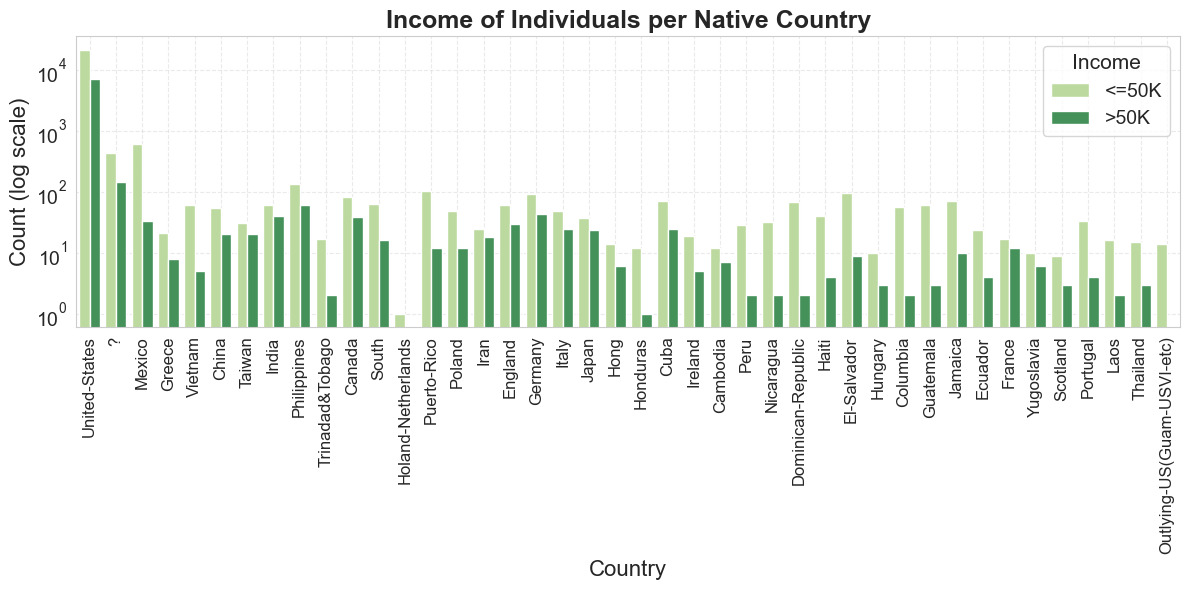

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='native.country',
    hue='income',
    data=data,
    palette=green_palette,
    hue_order=income_order
)

plt.title('Income of Individuals per Native Country', fontsize=18, fontweight='bold')
plt.xlabel('Country', fontsize=16)
plt.ylabel('Count (log scale)', fontsize=16)
plt.yscale('log')
plt.xticks(fontsize=12, rotation=90)  
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**Analisis Income per Native Country**

- United States:  
Mendominasi data secara keseluruhan (>90% populasi). Banyak individu di AS memiliki penghasilan >50K, namun mayoritas tetap ≤50K.

- Negara-negara lain (India, Vietnam, Mexico, Filipina, dll):  
Keseluruhannya berpenghasilan ≤50K, dan jumlah datanya sangat kecil.

- Negara-negara kecil seperti Honduras, Peru, Iran, dan sejenisnya:  
Sangat sedikit datanya dan hampir semuanya berada di kategori ≤50K.

Karena distribusi sangat tidak seimbang, bisa dipertimbangkan untuk drop kolom feature ini.

#### **Numerical Feature**

C:\Users\shane\AppData\Local\Temp\ipykernel_4836\2436431648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=data, palette=green_palette, order=income_order)


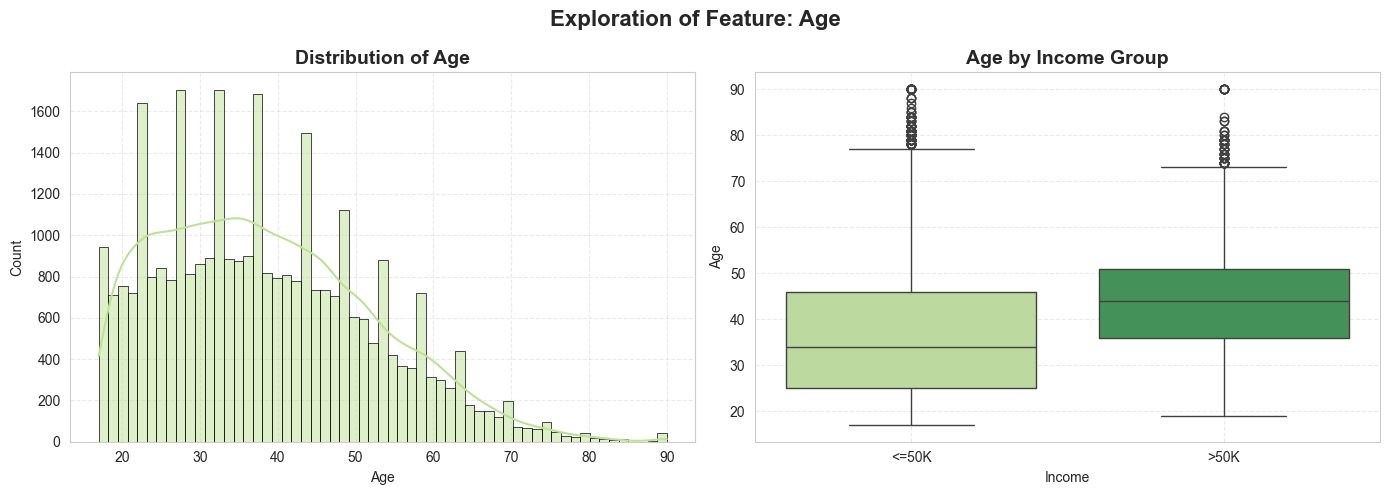

In [22]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True, color=green_palette[0], edgecolor='black', linewidth=0.5)
plt.title('Distribution of Age', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='age', data=data, palette=green_palette, order=income_order)
plt.title('Age by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Exploration of Feature: Age', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Saran untuk tahapan preprocessing:** melakukan binning untuk menyederhanakan feature age

C:\Users\shane\AppData\Local\Temp\ipykernel_4836\3628527348.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='fnlwgt', data=data, palette='YlGnBu')


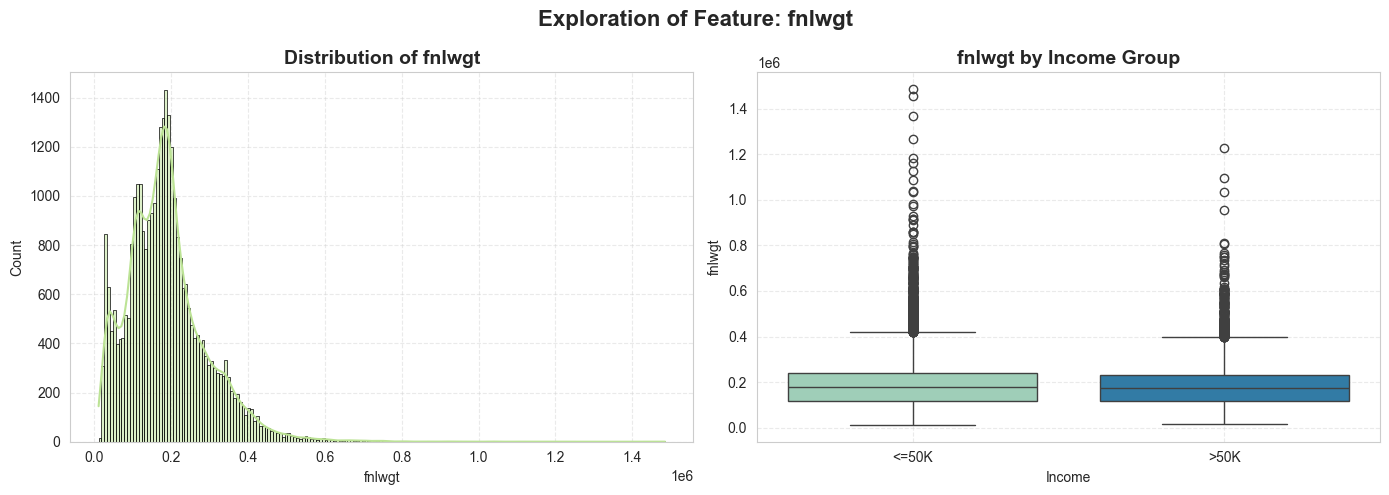

In [23]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['fnlwgt'], kde=True, color=green_palette[0], edgecolor='black', linewidth=0.5)
plt.title('Distribution of fnlwgt', fontsize=14, fontweight='bold')
plt.xlabel('fnlwgt')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='fnlwgt', data=data, palette='YlGnBu')
plt.title('fnlwgt by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('fnlwgt')
plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Exploration of Feature: fnlwgt', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


**Insight Fitur: fnlwgt (Final Weight)**
- `fnlwgt` atau *final weight* adalah bobot sampel dari populasi yang digunakan oleh Biro Sensus AS untuk menghasilkan estimasi populasi dari sampel survei.
- Mayoritas nilai `fnlwgt` berada di kisaran rendah (sekitar <500,000), namun terdapat sejumlah nilai ekstrem di atas 1 juta.
- Distribusi `fnlwgt` terlihat miring ke kanan (right-skewed), menunjukkan adanya **outlier**.
- Tidak terdapat perbedaan signifikan dalam distribusi `fnlwgt` antara kelompok penghasilan `<=50K` dan `>50K`.


C:\Users\shane\AppData\Local\Temp\ipykernel_4836\4264295511.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='education.num', data=data, palette='YlGnBu')


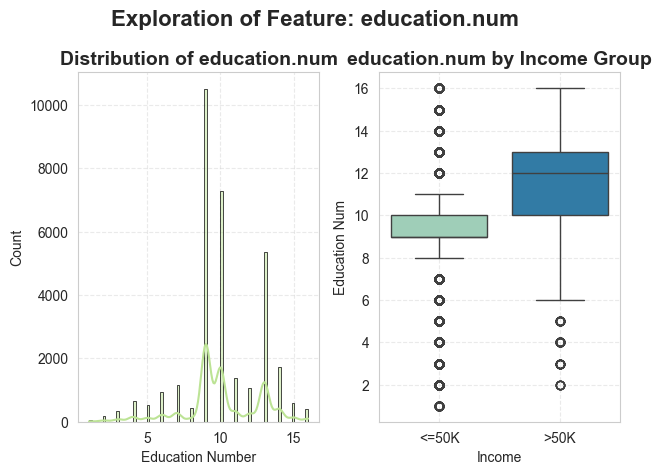

In [24]:
plt.subplot(1, 2, 1)
sns.histplot(data['education.num'], kde=True, color=green_palette[0], edgecolor='black', linewidth=0.5)
plt.title('Distribution of education.num', fontsize=14, fontweight='bold')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='education.num', data=data, palette='YlGnBu')
plt.title('education.num by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('Education Num')
plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Exploration of Feature: education.num', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Insight education.num**  
Terdapat beberapa puncak distribusi yang menunjukkan data terkonsentrasi di level pendidikan tertentu. Distribusinya tidak normal, tapi tersegmentasi berdasarkan sistem pendidikan formal.

- Kelompok >50K memiliki median yang lebih tinggi dibandingkan kelompok <=50K.
- Persebaran (IQR) untuk >50K juga berada di level pendidikan yang lebih tinggi (sekitar 12–14).
- Terdapat juga outlier data pada feature 
- Semakin tinggi angka education.num, semakin besar kemungkinan seseorang berpenghasilan >50K.

C:\Users\shane\AppData\Local\Temp\ipykernel_4836\158552608.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='capital.gain', data=data, palette='YlGnBu')


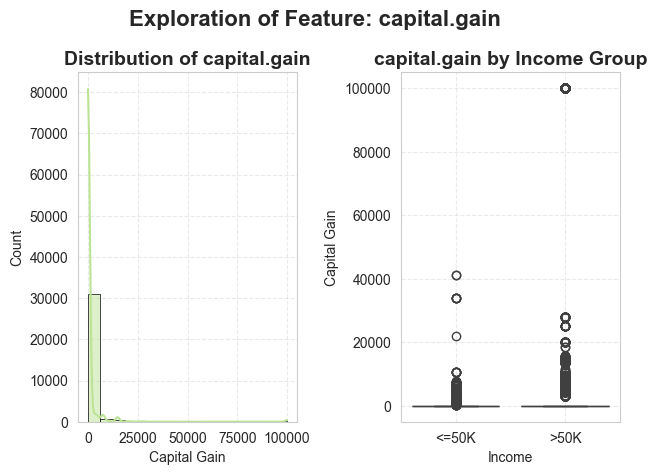

In [25]:
plt.subplot(1, 2, 1)
sns.histplot(data['capital.gain'], kde=True, color=green_palette[0], edgecolor='black', linewidth=0.5)
plt.title('Distribution of capital.gain', fontsize=14, fontweight='bold')
plt.xlabel('Capital Gain')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='capital.gain', data=data, palette='YlGnBu')
plt.title('capital.gain by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Exploration of Feature: capital.gain', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Insight Capital Gain**

- Mayoritas nilai 0, artinya sebagian besar orang tidak memiliki capital gain.
- Distribusinya sangat miring ke kanan (right-skewed), hanya sebagian kecil yang punya nilai >0.
- Terdapat outlier ekstrem hingga 100.000 

C:\Users\shane\AppData\Local\Temp\ipykernel_4836\2520492948.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='capital.loss', data=data, palette='YlGnBu')


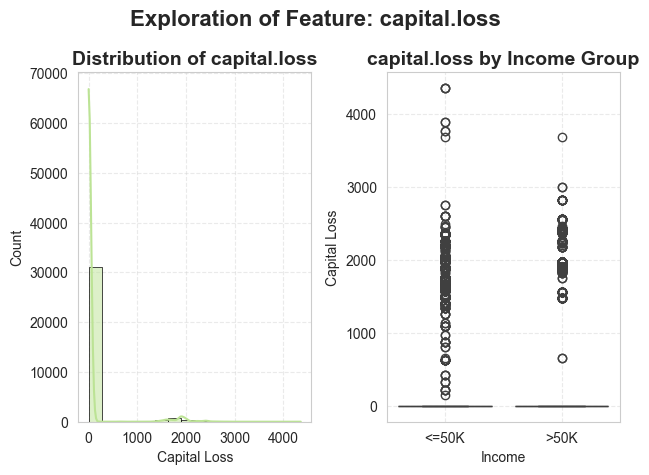

In [26]:
plt.subplot(1, 2, 1)
sns.histplot(data['capital.loss'], kde=True, color=green_palette[0], edgecolor='black', linewidth=0.5)
plt.title('Distribution of capital.loss', fontsize=14, fontweight='bold')
plt.xlabel('Capital Loss')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.4)

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='capital.loss', data=data, palette='YlGnBu')
plt.title('capital.loss by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('Capital Loss')
plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Exploration of Feature: capital.loss', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\shane\AppData\Local\Temp\ipykernel_4836\139524578.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours.per.week', data=data, palette='YlGnBu')


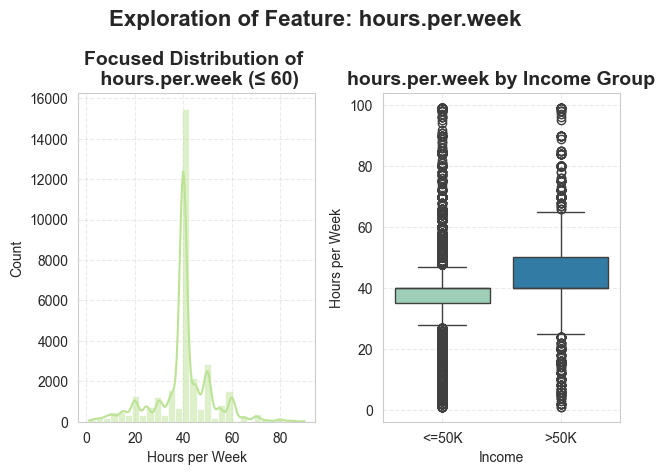

In [27]:
plt.subplot(1, 2, 1)
sns.histplot(data[data['hours.per.week'] <= 90]['hours.per.week'], kde=True, color=green_palette[0], bins=30)
plt.title('Focused Distribution of \n hours.per.week (≤ 60)', fontsize=14, fontweight='bold')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.boxplot(x='income', y='hours.per.week', data=data, palette='YlGnBu')
plt.title('hours.per.week by Income Group', fontsize=14, fontweight='bold')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.grid(True, linestyle='--', alpha=0.4)

plt.suptitle('Exploration of Feature: hours.per.week', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Analisis Hours per week**

- Mayoritas orang bekerja sekitar 40 jam per minggu, semakin sedikit yang bekerja di atas 60 jam.
- Orang yang bekerja >50 jam/minggu cenderung memiliki income >50K.
- Kelompok <=50K lebih terpusat pada jam kerja standar (35-40 jam).

### **d. Mapping Target Class Untuk Heatmap**

In [28]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'fnlwgt'),
  Text(0, 2.5, 'education.num'),
  Text(0, 3.5, 'capital.gain'),
  Text(0, 4.5, 'capital.loss'),
  Text(0, 5.5, 'hours.per.week'),
  Text(0, 6.5, 'income')])

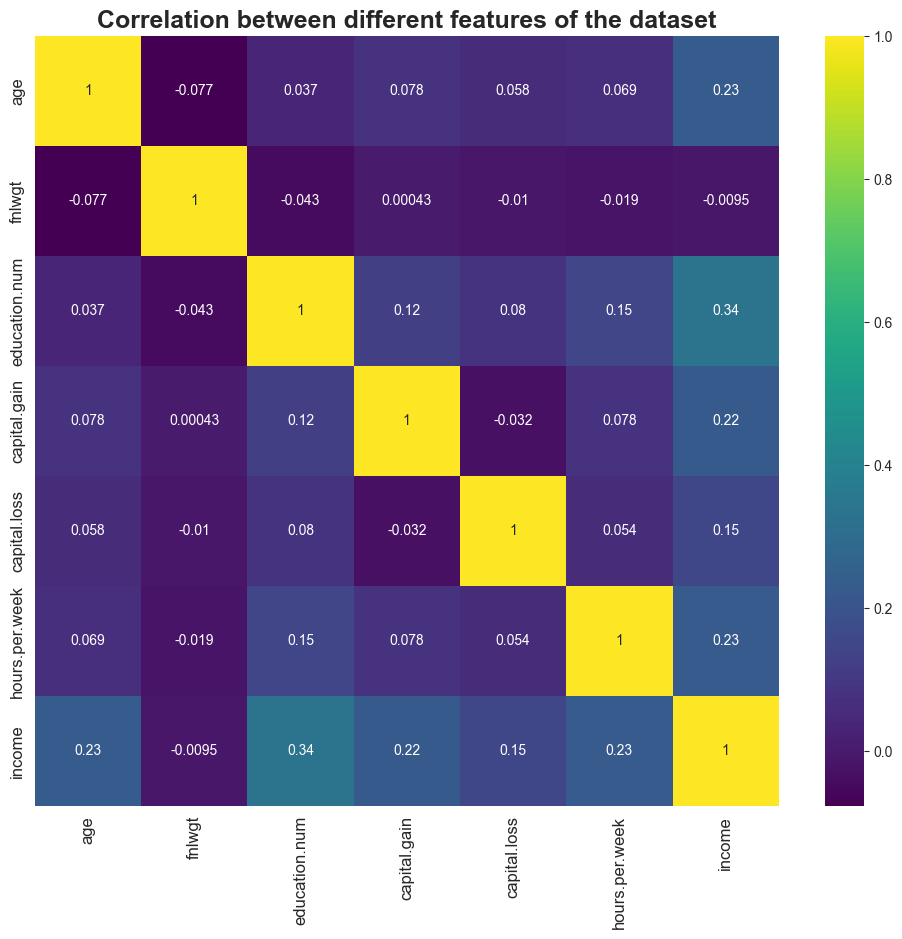

In [29]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
plt.title("Correlation between different features of the dataset", fontsize=18, fontweight='bold')
sns.heatmap(numeric_data.corr(), cmap='viridis', annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=90)

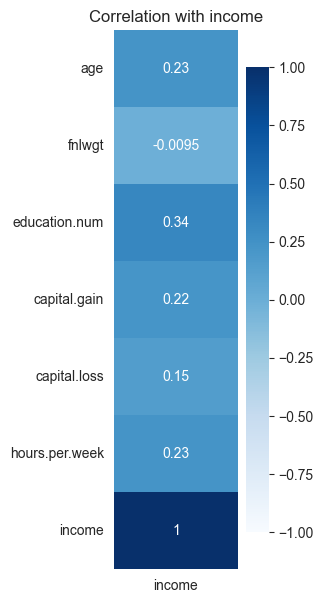

In [30]:
def plot_target_correlation_heatmap(df, target_variable):
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()
    
    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()

plot_target_correlation_heatmap(data, 'income')

### **5. Preprocessing**
 
Akan dilakukan beberapa langkah yaitu:  
**a. Menangani missing value**  
**b. Menangani data duplicate**     
**c. Feature Engineering**   
**d. Categorical Encoding**     
**e. Drop Irrelevant Feature**    
**f. Menangani Outlier**  
**g. Feature Scalling**  
**h. Splitting Data**     
**i. Hybrid Resampling (Undersampling + Oversampling)**     

#### **a. Menangani missing value**

In [31]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [32]:
data[data == '?'] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [33]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

##### **Insight Missing Value**

Dari memahami struktur data, kita tahu bahwa ada fitur yang berisi '?'. Oleh karena itu, kita ganti terlebih dahulu menjadi NaN supaya bisa mengetahui ada berapa nilai yang hilang. Kita dapat melihat bahwa kolom workclass, occupation, dan native.country mengandung nilai yang hilang.

**Langkah yang dipilih : Imputasi dengan nilai Modus**


In [34]:
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\shane\AppData\Local\Temp\ipykernel_4836\2011390148.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [35]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### **b. Menangani Data Duplicate**

In [36]:
data.duplicated().sum()

24

In [37]:
def duplicate_values(data):
    num_duplicates = data.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated row in the dataset.")
        data.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(data)

There are 24 duplicated row in the dataset.
24 duplicates were dropped!


#### **c. Feature Engineering**

In [38]:
def age_group(x):
    try:
        x = int(float(x)) 
        if 16 < x < 31:
            return "17-30"
        elif 30 < x < 41:
            return "31-40"
        elif 40 < x < 51:
            return "41-50"
        elif 50 < x < 61:
            return "51-60"
        elif 60 < x < 71:
            return "61-70"
        else:
            return "Greater than 70"
    except:
        return "Unknown"

data['age'] = data['age'].apply(age_group)

Melakukan Binning / Discretization yaitu proses mengelompokkan data numerik berkelanjutan ke dalam kelompok kategori

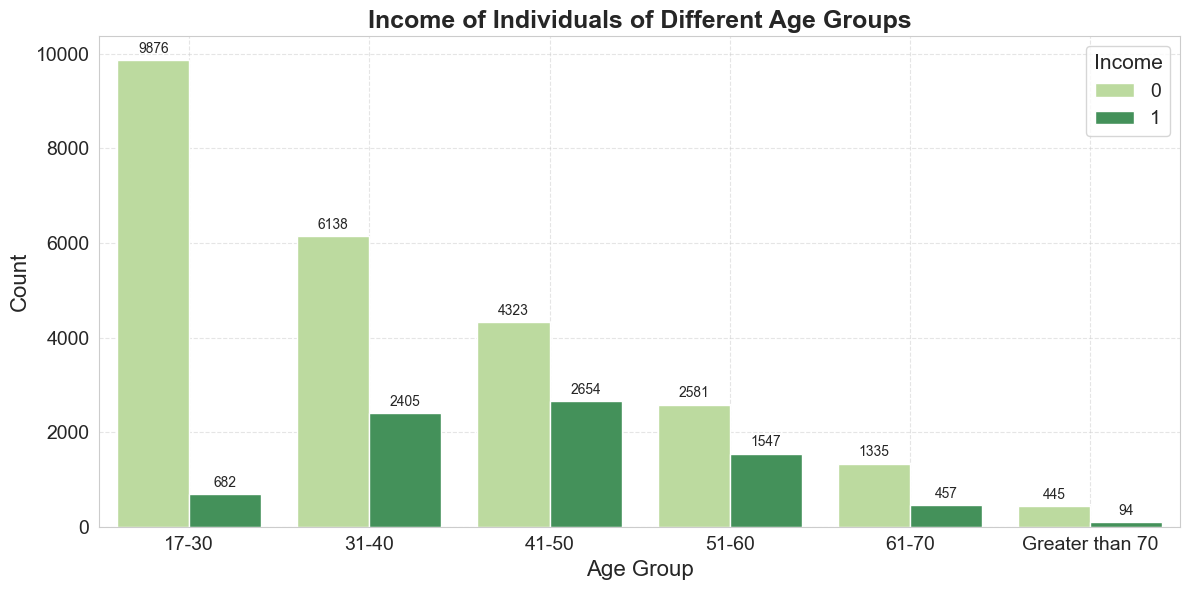

In [39]:
income_order = data['income'].value_counts().index.tolist() 
green_palette = sns.color_palette("YlGn", n_colors=2)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
order_list = ['17-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']

ax = sns.countplot(
    data=data,
    x='age',
    hue='income',
    palette=green_palette,
    order=order_list,
    hue_order=income_order  
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Income', fontsize=14, title_fontsize=15)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analisis Income per Group Age**
- Jumlah orang berpenghasilan lebih dari 50K dolar meningkat seiring bertambahnya usia hingga titik tertentu.
- Di kelompok usia **19-30** tahun, jumlah orang berpenghasilan >50K sangat sedikit.
- Di kelompok usia **41-50** dan **51-60** tahun, jumlah orang berpenghasilan >50K hampir setara dengan yang berpenghasilan <=50k.


In [40]:
education_simplify = {
    'Preschool': 'Basic',
    '1st-4th': 'Basic',
    '5th-6th': 'Basic',
    '7th-8th': 'Basic',
    '9th': 'Basic',
    '10th': 'Basic',
    '11th': 'Basic',
    '12th': 'Basic',
    'HS-grad': 'Intermediate',
    'Some-college': 'Intermediate',
    'Assoc-acdm': 'Intermediate',
    'Assoc-voc': 'Intermediate',
    'Bachelors': 'Advanced',
    'Masters': 'Advanced',
    'Doctorate': 'Advanced',
    'Prof-school': 'Advanced'
}

data['education'] = data['education'].map(education_simplify)

In [41]:
workclass_simplify = {
    'Private': 'Private',
    'Self-emp-not-inc': 'Self-employed',
    'Self-emp-inc': 'Self-employed',
    'Federal-gov': 'Government',
    'State-gov': 'Government',
    'Local-gov': 'Government',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed',
}
data['workclass'] = data['workclass'].map(workclass_simplify)

#### **d. Categorical Encoding**

In [42]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns if col != 'income']

encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le  

#### **e. Drop Irrelevant Feature**

,Feature,Correlation with Income
0,education.num,0.335272
1,education,-0.265255
2,relationship,-0.250948
3,hours.per.week,0.229658
4,capital.gain,0.223336
5,sex,0.215969
6,age,0.215570
7,marital.status,-0.199199
8,capital.loss,0.150501
9,race,0.071847


C:\Users\shane\AppData\Local\Temp\ipykernel_4836\3202302521.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Correlation with Income', y='Feature', palette=green_palette)
C:\Users\shane\AppData\Local\Temp\ipykernel_4836\3202302521.py:10: UserWarning: 
The palette list has fewer values (2) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=correlation_df, x='Correlation with Income', y='Feature', palette=green_palette)


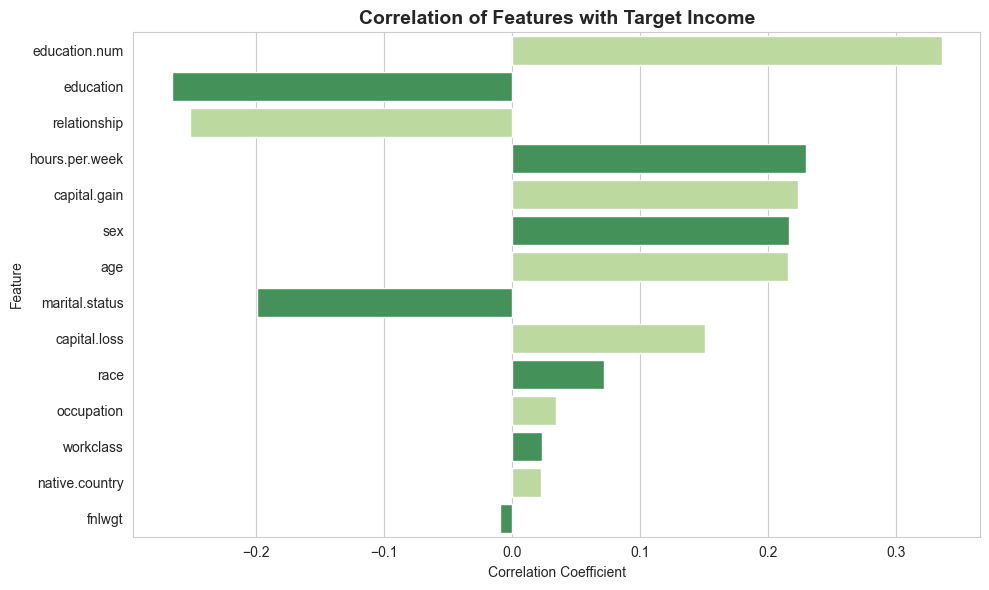

In [43]:
num_features = data.select_dtypes(include=['number']).columns.tolist()
num_features.remove('income')
correlations = data[num_features + ['income']].corr()['income'].drop('income').sort_values(key=abs, ascending=False)

correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation with Income']
display(correlation_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Correlation with Income', y='Feature', palette=green_palette)
plt.title('Correlation of Features with Target Income', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [44]:
data.drop(['race'], axis=1, inplace=True)
data.drop(['native.country'], axis=1, inplace=True)
data.drop(['workclass'], axis=1, inplace=True)
data.drop(['fnlwgt'], axis=1, inplace=True)
data.drop(['occupation'], axis=1, inplace=True)

In [45]:
print("=== Remaining Features After Dropping Low-Correlation Features ===")
print(f"Remaining features: {list(data.columns)}")
print(f"Total features: {len(data.columns)}")
print(f"Data shape: {data.shape}")
print()

remaining_features = data.columns.tolist()
if 'income' in remaining_features:
    remaining_features.remove('income')
    
print(f"Numerical features to check for outliers: {remaining_features}")

=== Remaining Features After Dropping Low-Correlation Features ===
Remaining features: ['age', 'education', 'education.num', 'marital.status', 'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
Total features: 10
Data shape: (32537, 10)

Numerical features to check for outliers: ['age', 'education', 'education.num', 'marital.status', 'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']


### **f. Menangani Outlier**
Strategi:
- **IQR Method**: Deteksi outlier menggunakan Q1-1.5*IQR dan Q3+1.5*IQR  
- **Domain-Aware**: Perlakuan khusus untuk capital.gain dan capital.loss
- **Winsorization**: Cap outlier pada percentile 5-95 untuk feature lain

In [46]:
print("=== Streamlined Outlier Detection & Handling ===")

numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'income' in numerical_cols:
    numerical_cols.remove('income')

print(f"Processing features: {numerical_cols}")

def detect_and_handle_outliers(df):
    """Streamlined outlier detection and handling"""
    df_processed = df.copy()
    outlier_summary = {}
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_pct = (outliers / len(df)) * 100
        
        outlier_summary[col] = {
            'outliers': outliers,
            'percentage': outlier_pct,
            'original_range': [df[col].min(), df[col].max()]
        }
        
        if col in ['capital.gain', 'capital.loss']:
            strategy = 'keep'
            print(f"{col:15} | {outliers:4} outliers ({outlier_pct:5.1f}%) | KEPT (financial data)")
        else:
            strategy = 'cap'
            lower_cap = df[col].quantile(0.05)  
            upper_cap = df[col].quantile(0.95)  
            
            original_extreme = ((df_processed[col] < lower_cap) | (df_processed[col] > upper_cap)).sum()
            df_processed[col] = df_processed[col].clip(lower=lower_cap, upper=upper_cap)
            
            print(f"{col:15} | {outliers:4} outliers ({outlier_pct:5.1f}%) | CAPPED {original_extreme} values")
            outlier_summary[col]['new_range'] = [df_processed[col].min(), df_processed[col].max()]
    
    return df_processed, outlier_summary

data_cleaned, summary = detect_and_handle_outliers(data)

print(f"\n\nCompleted!")
print(f"Original shape: {data.shape}")
print(f"Final shape: {data_cleaned.shape}")
print(f"Data loss: 0 rows (only capping applied)")

data = data_cleaned.copy()

=== Streamlined Outlier Detection & Handling ===
Processing features: ['age', 'education', 'education.num', 'marital.status', 'relationship', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']
age             |    0 outliers (  0.0%) | CAPPED 539 values
education       |    0 outliers (  0.0%) | CAPPED 0 values
education.num   | 1193 outliers (  3.7%) | CAPPED 2182 values
marital.status  |    0 outliers (  0.0%) | CAPPED 993 values
relationship    |    0 outliers (  0.0%) | CAPPED 1568 values
sex             |    0 outliers (  0.0%) | CAPPED 0 values
capital.gain    | 2712 outliers (  8.3%) | KEPT (financial data)
capital.loss    | 1519 outliers (  4.7%) | KEPT (financial data)
hours.per.week  | 9002 outliers ( 27.7%) | CAPPED 2721 values


Completed!
Original shape: (32537, 10)
Final shape: (32537, 10)
Data loss: 0 rows (only capping applied)


#### **g.  Feature Scalling**

In [47]:
num_features = data.select_dtypes(include='number').columns.tolist()
num_features.remove('income')  

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[num_features])
scaled_data = pd.DataFrame(scaled_features, columns=num_features)

scaled_data['income'] = data['income'].values

In [48]:
scaled_data.head()

,age,education,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,2.113058,0.733088,-0.471427,1.672670,-0.263468,-1.422436,-0.145975,10.589625,-0.027379,0
1,2.113058,0.733088,-0.471427,1.672670,-0.263468,-1.422436,-0.145975,10.589625,-2.182426,0
2,2.113058,0.733088,-0.043016,1.672670,1.720742,-1.422436,-0.145975,10.589625,-0.027379,0
3,1.313079,-0.437528,-2.185069,-1.784557,1.720742,-1.422436,-0.145975,9.458380,-0.027379,0
4,0.513101,0.733088,-0.043016,1.672670,1.059339,-1.422436,-0.145975,9.458380,-0.027379,0


In [49]:
scaled_data.tail()

,age,education,education.num,marital.status,relationship,sex,capital.gain,capital.loss,hours.per.week,income
32532,-1.086857,0.733088,-0.043016,0.981225,-0.263468,0.703020,-0.145975,-0.216743,-0.027379,0
32533,-1.086857,0.733088,0.813805,-0.401666,1.720742,-1.422436,-0.145975,-0.216743,-0.223292,0
32534,-0.286878,0.733088,-0.471427,-0.401666,-0.924871,0.703020,-0.145975,-0.216743,-0.027379,1
32535,1.313079,0.733088,-0.471427,1.672670,1.720742,-1.422436,-0.145975,-0.216743,-0.027379,0
32536,-1.086857,0.733088,-0.471427,0.981225,1.059339,0.703020,-0.145975,-0.216743,-1.986512,0


,Feature,Correlation with Income
0,education.num,0.335784
1,relationship,-0.284189
2,education,-0.265255
3,hours.per.week,0.253856
4,age,0.224677
5,capital.gain,0.223336
6,sex,0.215969
7,marital.status,-0.199803
8,capital.loss,0.150501


C:\Users\shane\AppData\Local\Temp\ipykernel_4836\3216255194.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Correlation with Income', y='Feature', palette=green_palette)
C:\Users\shane\AppData\Local\Temp\ipykernel_4836\3216255194.py:7: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=correlation_df, x='Correlation with Income', y='Feature', palette=green_palette)


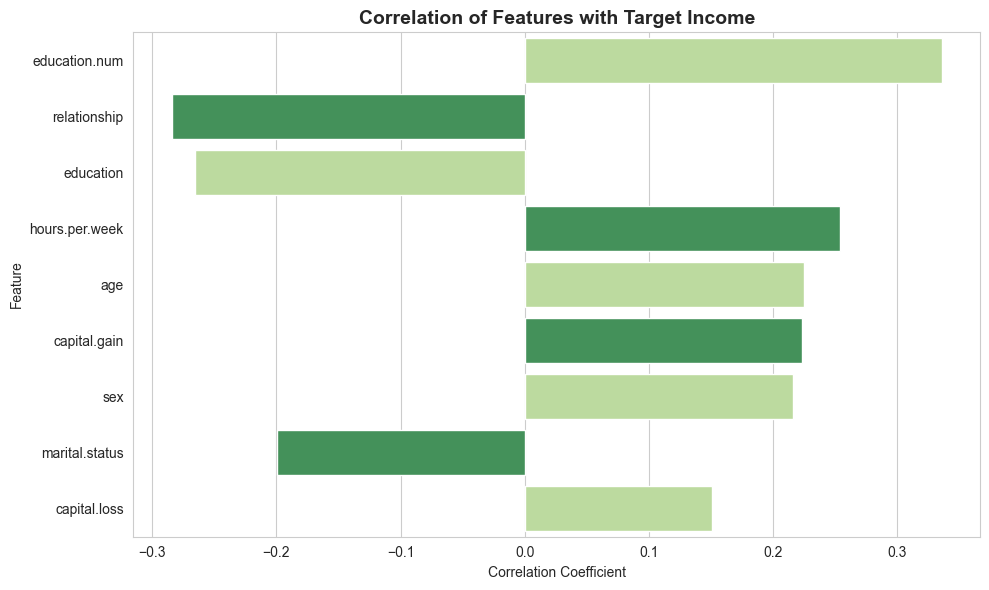

In [50]:
correlations = scaled_data.drop('income', axis=1).corrwith(scaled_data['income']).sort_values(key=abs, ascending=False)
correlation_df = correlations.reset_index()
correlation_df.columns = ['Feature', 'Correlation with Income']
display(correlation_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Correlation with Income', y='Feature', palette=green_palette)
plt.title('Correlation of Features with Target Income', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### **h. Splitting Data**

In [51]:
X = scaled_data.drop("income", axis=1)
y = scaled_data["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#### **i. Hybrid Resampling (Undersampling + Oversampling)**

In [52]:
train_data = X_train.copy()
train_data['income'] = y_train

data_majority = train_data[train_data['income'] == 0]  
data_minority = train_data[train_data['income'] == 1]  

data_majority_under = data_majority.sample(n=15000, random_state=42)

train_balanced = pd.concat([data_majority_under, data_minority], axis=0)

X_balanced = train_balanced.drop('income', axis=1)
y_balanced = train_balanced['income']

smote = SMOTE(k_neighbors=5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_balanced, y_balanced)

print("Distribusi label setelah hybrid resampling (SMOTE + undersample):")
print(pd.Series(y_train_resampled).value_counts())

Distribusi label setelah hybrid resampling (SMOTE + undersample):
income
0    15000
1    15000
Name: count, dtype: int64


### **6. Modelling**

In [53]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

In [54]:
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    
    acc   = accuracy_score(y_test, y_pred)
    prec  = precision_score(y_test, y_pred)
    rec   = recall_score(y_test, y_pred)
    f1    = f1_score(y_test, y_pred)
    
    print(f"=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

=== Decision Tree ===
Accuracy : 0.8030
Precision: 0.5655
Recall   : 0.7876
F1 Score : 0.6583

Classification Report:
              precision    recall  f1-score   support

           0     0.9230    0.8079    0.8616      4940
           1     0.5655    0.7876    0.6583      1568

    accuracy                         0.8030      6508
   macro avg     0.7442    0.7978    0.7600      6508
weighted avg     0.8369    0.8030    0.8126      6508

Confusion Matrix:
[[3991  949]
 [ 333 1235]]

--------------------------------------------------

=== Random Forest ===
Accuracy : 0.8055
Precision: 0.5684
Recall   : 0.8004
F1 Score : 0.6647

Classification Report:
              precision    recall  f1-score   support

           0     0.9272    0.8071    0.8630      4940
           1     0.5684    0.8004    0.6647      1568

    accuracy                         0.8055      6508
   macro avg     0.7478    0.8037    0.7639      6508
weighted avg     0.8408    0.8055    0.8152      6508

Confusion Ma

**Evaluasi Model Klasifikasi**

Berdasarkan hasil evaluasi terhadap lima model, performa secara keseluruhan (dilihat dari akurasi) menunjukkan bahwa model `Naive Bayes` mencatat akurasi tertinggi:

- Naive Bayes – 0.8261
- Gradient Boosting – 0.8161
- Random Forest – 0.8070
- Decision Tree – 0.8033
- KNN – 0.8030

Namun karena data tidak seimbang (kelas 1 jauh lebih sedikit), maka fokus utama ada pada kemampuan model mengenali kelas minoritas (label = 1).

**Performa pada Kelas 1 (Label = 1)** 
Model dengan F1-Score terbaik untuk kelas 1 (menggabungkan precision dan recall):

- Gradient Boosting — F1: 0.6856
- Random Forest — F1: 0.6675
- Decision Tree — F1: 0.6590
- Naive Bayes — F1: 0.5919
- KNN — F1: 0.4872

### **7. Cross-Validation Evaluation (k=10)**

**Robust model evaluation using 10-fold cross-validation for reliable performance estimates.**

In [55]:
cv_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

cv_results = {}

print("=== 10-Fold Cross-Validation Results ===\n")

for name, model in cv_models.items():
    print(f"Evaluating {name}...")
    accuracy_scores = cross_val_score(model, X_train_resampled, y_train_resampled, 
                                    cv=cv_folds, scoring='accuracy', n_jobs=-1)
    precision_scores = cross_val_score(model, X_train_resampled, y_train_resampled, 
                                     cv=cv_folds, scoring='precision', n_jobs=-1)
    recall_scores = cross_val_score(model, X_train_resampled, y_train_resampled, 
                                  cv=cv_folds, scoring='recall', n_jobs=-1)
    f1_scores = cross_val_score(model, X_train_resampled, y_train_resampled, 
                              cv=cv_folds, scoring='f1', n_jobs=-1)

    cv_results[name] = {
        'accuracy': accuracy_scores,
        'precision': precision_scores,
        'recall': recall_scores,
        'f1': f1_scores
    }

    print(f"   Accuracy:  {accuracy_scores.mean():.4f} (±{accuracy_scores.std():.4f})")
    print(f"   Precision: {precision_scores.mean():.4f} (±{precision_scores.std():.4f})")
    print(f"   Recall:    {recall_scores.mean():.4f} (±{recall_scores.std():.4f})")
    print(f"   F1-Score:  {f1_scores.mean():.4f} (±{f1_scores.std():.4f})")
    print()

print("=== Cross-Validation Summary (Mean ± Std) ===")
print(f"{'Model':<18} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 66)

for name in cv_models.keys():
    acc_mean, acc_std = cv_results[name]['accuracy'].mean(), cv_results[name]['accuracy'].std()
    prec_mean, prec_std = cv_results[name]['precision'].mean(), cv_results[name]['precision'].std()
    rec_mean, rec_std = cv_results[name]['recall'].mean(), cv_results[name]['recall'].std()
    f1_mean, f1_std = cv_results[name]['f1'].mean(), cv_results[name]['f1'].std()
    
    print(f"{name:<18} {acc_mean:.3f}±{acc_std:.3f}  {prec_mean:.3f}±{prec_std:.3f}  "
          f"{rec_mean:.3f}±{rec_std:.3f}  {f1_mean:.3f}±{f1_std:.3f}")

best_model = max(cv_results.keys(), key=lambda x: cv_results[x]['f1'].mean())
print(f"\nBest Model (F1-Score): {best_model} ({cv_results[best_model]['f1'].mean():.4f})")

=== 10-Fold Cross-Validation Results ===

Evaluating Decision Tree...
   Accuracy:  0.8423 (±0.0072)
   Precision: 0.8236 (±0.0070)
   Recall:    0.8713 (±0.0091)
   F1-Score:  0.8467 (±0.0071)

Evaluating Random Forest...
   Accuracy:  0.8475 (±0.0069)
   Precision: 0.8235 (±0.0059)
   Recall:    0.8846 (±0.0100)
   F1-Score:  0.8529 (±0.0069)

Evaluating Gradient Boosting...
   Accuracy:  0.8403 (±0.0058)
   Precision: 0.8215 (±0.0060)
   Recall:    0.8695 (±0.0076)
   F1-Score:  0.8448 (±0.0057)

Evaluating K-Nearest Neighbors...
   Accuracy:  0.6900 (±0.0061)
   Precision: 0.8623 (±0.0140)
   Recall:    0.4525 (±0.0110)
   F1-Score:  0.5934 (±0.0098)

Evaluating Naive Bayes...
   Accuracy:  0.7281 (±0.0050)
   Precision: 0.8689 (±0.0091)
   Recall:    0.5373 (±0.0097)
   F1-Score:  0.6640 (±0.0077)

=== Cross-Validation Summary (Mean ± Std) ===
Model              Accuracy     Precision    Recall       F1-Score    
------------------------------------------------------------------
D

### **8. Hyperparameter Tuning for Random Forest**

**Comprehensive hyperparameter optimization for all models using GridSearchCV with cross-validation comparison.**

In [56]:
print("Hyperparameter Tuning For Random Forest")
print("=" * 50)
print("Goal: Find the best settings for Random Forest to improve performance")
print()

rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

print("Parameters we're testing:")
for param, values in rf_params.items():
    print(f"   {param}: {values}")
print()

default_rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=30,                    
    cv=10,                        
    scoring='f1',                 
    random_state=42,
    n_jobs=-1,                    
    verbose=1                    
)

rf_search.fit(X_train_resampled, y_train_resampled)

print(f"Best F1-Score during tuning: {rf_search.best_score_:.4f}")
print(f"Best Parameters found:")
for param, value in rf_search.best_params_.items():
    print(f"   {param}: {value}")

tuned_rf = rf_search.best_estimator_

Hyperparameter Tuning For Random Forest
Goal: Find the best settings for Random Forest to improve performance

Parameters we're testing:
   n_estimators: [100, 200, 300, 500]
   max_depth: [10, 20, 30, None]
   min_samples_split: [2, 5, 10]
   min_samples_leaf: [1, 2, 4]
   max_features: ['sqrt', 'log2']
   class_weight: ['balanced', None]

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best F1-Score during tuning: 0.8561
Best Parameters found:
   n_estimators: 200
   min_samples_split: 10
   min_samples_leaf: 1
   max_features: log2
   max_depth: 20
   class_weight: None


In [57]:
print("\nComparing Default vs Tuned Random Forest")
print("=" * 50)
print()

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("Testing DEFAULT Random Forest...")
default_f1_scores = cross_val_score(default_rf, X_train_resampled, y_train_resampled, 
                                   cv=cv_strategy, scoring='f1', n_jobs=-1)
default_accuracy_scores = cross_val_score(default_rf, X_train_resampled, y_train_resampled, 
                                         cv=cv_strategy, scoring='accuracy', n_jobs=-1)

print(f"F1-Score: {default_f1_scores.mean():.4f} (±{default_f1_scores.std():.3f})")
print(f"Accuracy: {default_accuracy_scores.mean():.4f} (±{default_accuracy_scores.std():.3f})")

print("\nTesting TUNED Random Forest...")
tuned_f1_scores = cross_val_score(tuned_rf, X_train_resampled, y_train_resampled, 
                                 cv=cv_strategy, scoring='f1', n_jobs=-1)
tuned_accuracy_scores = cross_val_score(tuned_rf, X_train_resampled, y_train_resampled, 
                                       cv=cv_strategy, scoring='accuracy', n_jobs=-1)

print(f"F1-Score: {tuned_f1_scores.mean():.4f} (±{tuned_f1_scores.std():.3f})")
print(f"Accuracy: {tuned_accuracy_scores.mean():.4f} (±{tuned_accuracy_scores.std():.3f})")

f1_improvement = ((tuned_f1_scores.mean() - default_f1_scores.mean()) / default_f1_scores.mean()) * 100
accuracy_improvement = ((tuned_accuracy_scores.mean() - default_accuracy_scores.mean()) / default_accuracy_scores.mean()) * 100

print(f"Improvement Analysis")
print("=" * 30)
print(f"F1-Score Improvement: {f1_improvement:+.2f}%")
print(f"Accuracy Improvement: {accuracy_improvement:+.2f}%")

f1_improved = "YES" if f1_improvement > 0 else "NO"
accuracy_improved = "YES" if accuracy_improvement > 0 else "NO"

print(f"F1-Score Better? {f1_improved}")
print(f"Accuracy Better? {accuracy_improved}")

print(f"FINAL RESULTS")
print("=" * 30)
print(f"Best Random Forest F1-Score: {max(default_f1_scores.mean(), tuned_f1_scores.mean()):.4f}")
if tuned_f1_scores.mean() > default_f1_scores.mean():
    print("Recommendation: Use TUNED Random Forest")
    final_model = tuned_rf
else:
    print("Recommendation: Use DEFAULT Random Forest")
    final_model = default_rf

print("Hyperparameter tuning process completed!")


Comparing Default vs Tuned Random Forest

Testing DEFAULT Random Forest...
F1-Score: 0.8529 (±0.007)
Accuracy: 0.8475 (±0.007)

Testing TUNED Random Forest...
F1-Score: 0.8552 (±0.006)
Accuracy: 0.8494 (±0.006)
Improvement Analysis
F1-Score Improvement: +0.27%
Accuracy Improvement: +0.22%
F1-Score Better? YES
Accuracy Better? YES
FINAL RESULTS
Best Random Forest F1-Score: 0.8552
Recommendation: Use TUNED Random Forest
Hyperparameter tuning process completed!


In [58]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("Model, scaler, nama fitur, dan label encoders telah disimpan ke file pickle.")


Model, scaler, nama fitur, dan label encoders telah disimpan ke file pickle.
